# Zomato Restaurant

Project Description-

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets


Dataset Link-  
•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx        
•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv



# PART-I (Predicting Average cost for two)

# Importing libraries-

In [46]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing dataset-

In [47]:
#Importing data frame-1 from country code file-

In [48]:
df1=pd.read_excel(r'C:\Users\prate\Country-Code.xlsx')
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [49]:
#Importing data frame-2 from zomato csv-

In [50]:
df2=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding='latin1')
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [51]:
#Cobining two data frames-

In [52]:
df=pd.merge(df1,df2)
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


# Data Cleaning-

In [53]:
df.shape

(9551, 22)

The data set contains the 9551 rows and 22 columns.

In [54]:
#Checking data types in the columns-

In [55]:
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

Here we can see that int64,object and float type data available in the dataset. object data we need to encode going further for model building.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

Looking above results Seems like dataset do not have null values having float,int and object data in it.

# List of columns-

In [57]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Checking null values-

In [58]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Here we can see that in cuisine column has null values which we are going to replace.

# Replacing null values-

In [59]:
df['Cuisines']=df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [60]:
#Checking null values again-

In [61]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<AxesSubplot:>

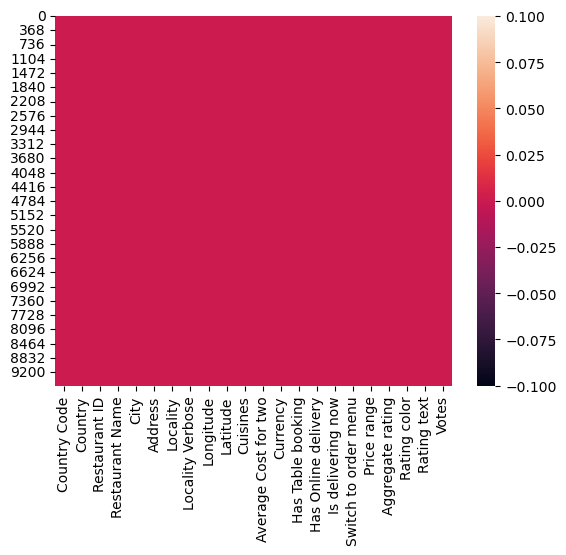

In [62]:
sns.heatmap(df.isnull())

Now we can see that all the null has been replaced.

# Checking for duplicate values in the dataset-

In [63]:
df.duplicated().sum()

0

There are no duplicate values present in the data set.

# Checking no of unique values in each column-

In [64]:
df.nunique().to_frame('No of unique values')

,No of unique values
Country Code,15
Country,15
Restaurant ID,9551
Restaurant Name,7446
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677


# Value count of the dataset-

In [65]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64


India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


3400025     1
309811      1
18460981    1
18287389    1
1629        1
           ..
4096        1
18358700    1
2217        1
18398571    1
17559793    1
Name: Restaurant ID, Length: 9551, dtype: int64


Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
 

Here we can see that latitude and longitude both have 0 values which is not possible as longitude & latitude cant be 0 so we will replace them with average.

In [66]:
df['Longitude']=df['Longitude'].replace(0,df['Longitude'].mean())

In [67]:
df['Latitude']=df['Latitude'].replace(0,df['Latitude'].mean())

In [68]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64


India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


3400025     1
309811      1
18460981    1
18287389    1
1629        1
           ..
4096        1
18358700    1
2217        1
18398571    1
17559793    1
Name: Restaurant ID, Length: 9551, dtype: int64


Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
 

Now we can see that 0 has been replaced by the average of the columns.

# Dropping Unessasary columns-

In [69]:
df=df.drop(columns=['Country Code','Restaurant ID'],axis=1)
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,India,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,India,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",64.126574,25.854381,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,India,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,India,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,United States,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,"American, Bar Food",10,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,United States,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,Thai,10,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,United States,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,United States,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


Here we have dropped Country Code,Restaurant ID columns which were having nominal data & doesnt had impact on predicting the target variable.

# Separating object data columns-

In [70]:
object=[]

for i in df.columns:
    if df[i].dtype=='object':
        object.append(i)

In [71]:
object

['Country',
 'Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

# Separating Continous data columns-

In [72]:
continous=[]

for i in df.columns:
    if df[i].dtype=='int64':
        continous.append(i)
    elif df[i].dtype=='float64':
        continous.append(i)

In [73]:
continous

['Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

Here we have separated the object & continous data columns.

# Checking Statistics-

In [74]:
df.describe()

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,67.470207,27.202458,1199.210763,1.804837,2.666370,156.909748
std,38.650973,9.192377,16121.183073,0.905609,1.516378,430.169145
min,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<AxesSubplot:>

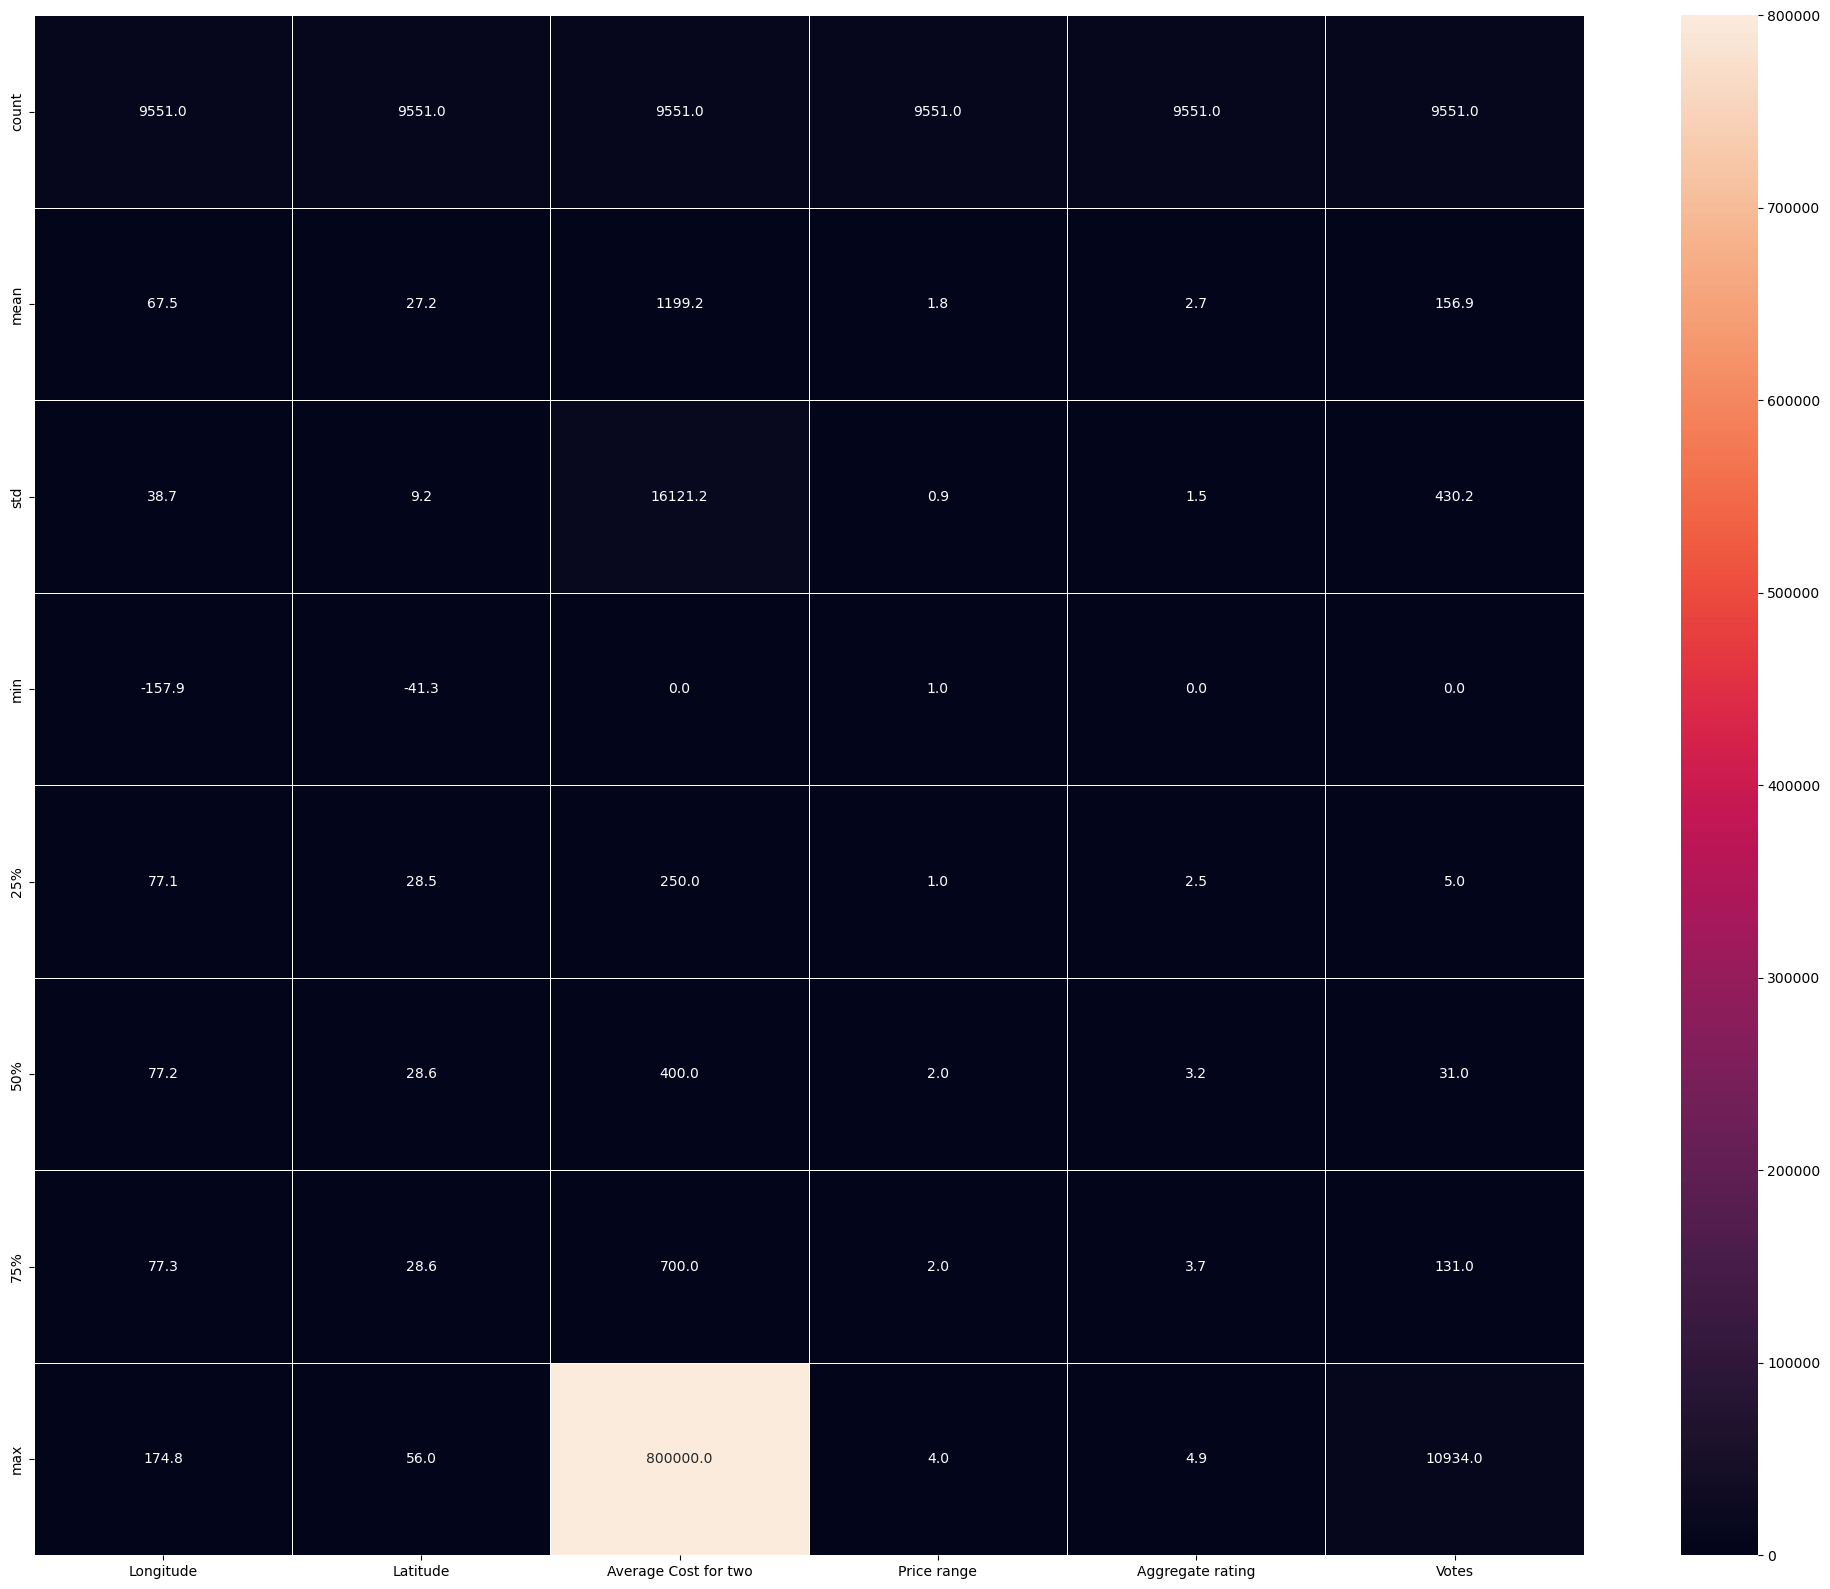

In [75]:
plt.figure(figsize=(25,20))
sns.heatmap(df.describe(),annot=True,fmt='.1f',linewidth=0.5,color='pink')

# Observations-

1. Here we can see that all the columns has same count so there are no null values present in the dataset.
2. Mean is greater than median in columns like Country code,Averagecostfortwo,Votes columns which means data is right skewed in these columns.
3. Median is greater than mean in columns like Latitide,Longitude,price range,aggregate rating,votes columns which means data is left skewed in these columns.
4. The difference bw 75% and max values in columns like Longitude,Latitude,Average Cost for two,Votes column which means data having a lot of outliers in these columns.

# Exploratory data analysis-

# Univariate analysis-

In [76]:
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,India,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,India,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",64.126574,25.854381,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,India,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,India,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,United States,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,"American, Bar Food",10,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,United States,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,Thai,10,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,United States,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,United States,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Phillipines'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'UAE'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

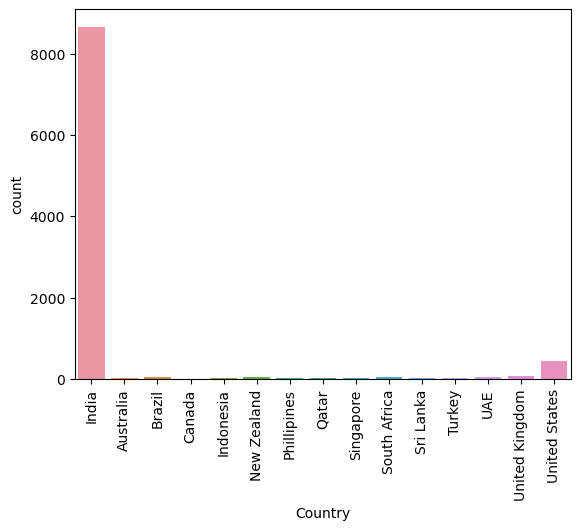

In [77]:
sns.countplot(df['Country'])
plt.xticks(rotation=90)

The data has high count of india as a country.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Indian Rupees(Rs.)'),
  Text(1, 0, 'Dollar($)'),
  Text(2, 0, 'Brazilian Real(R$)'),
  Text(3, 0, 'Indonesian Rupiah(IDR)'),
  Text(4, 0, 'NewZealand($)'),
  Text(5, 0, 'Botswana Pula(P)'),
  Text(6, 0, 'Qatari Rial(QR)'),
  Text(7, 0, 'Rand(R)'),
  Text(8, 0, 'Sri Lankan Rupee(LKR)'),
  Text(9, 0, 'Turkish Lira(TL)'),
  Text(10, 0, 'Emirati Diram(AED)'),
  Text(11, 0, 'Pounds(\x8c£)')])

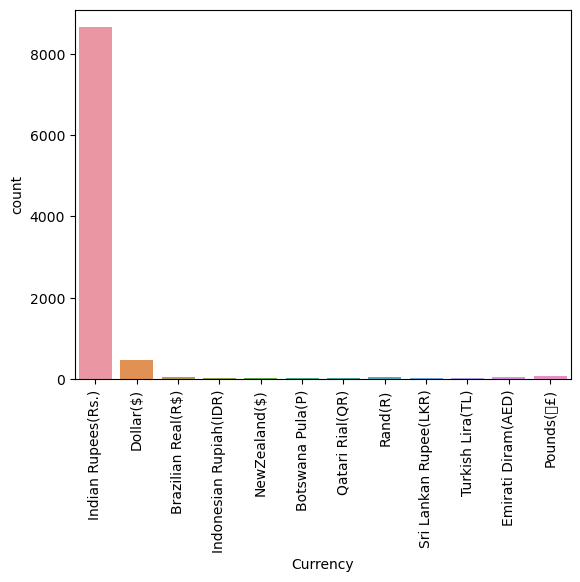

In [78]:
sns.countplot(df['Currency'])
plt.xticks(rotation=90)

The data has high count of indian currency.

<AxesSubplot:xlabel='Average Cost for two', ylabel='Count'>

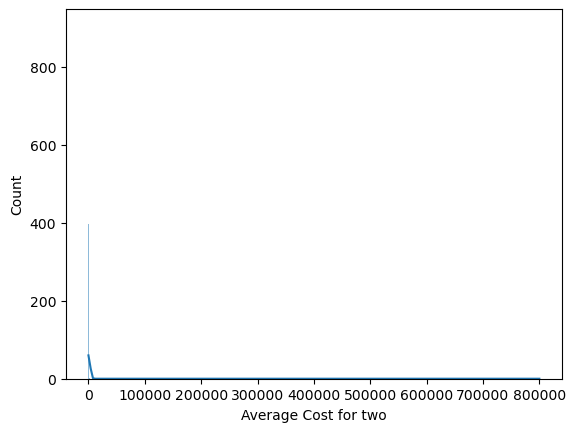

In [79]:
sns.histplot(df['Average Cost for two'],kde=True)

Average Cost for two has the range bw 0 to 800000.

<AxesSubplot:xlabel='Has Table booking', ylabel='count'>

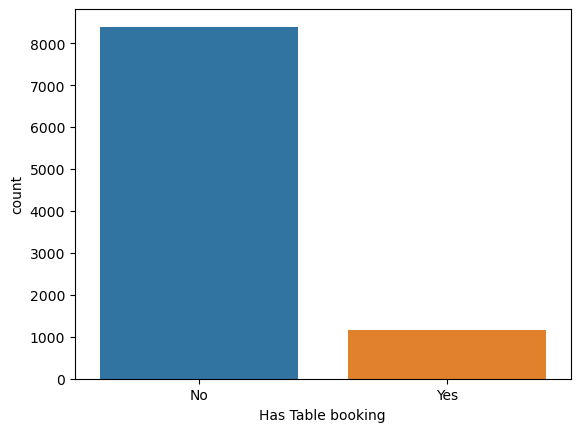

In [80]:
sns.countplot(df['Has Table booking'])

Most of the hotels do not have the services of table booking.

<AxesSubplot:xlabel='Has Online delivery', ylabel='count'>

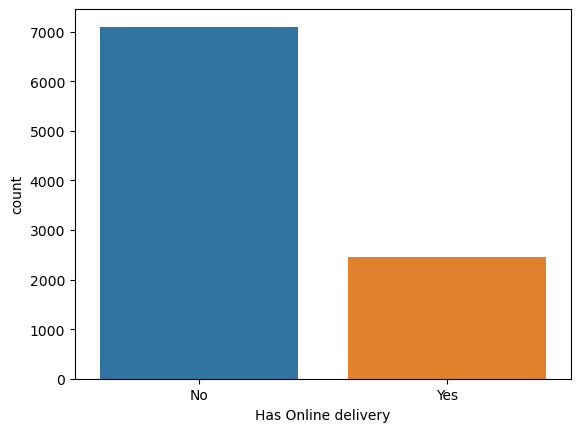

In [81]:
sns.countplot(df['Has Online delivery'])

Most of the hotels do not have the services of online delivery.

<AxesSubplot:xlabel='Is delivering now', ylabel='count'>

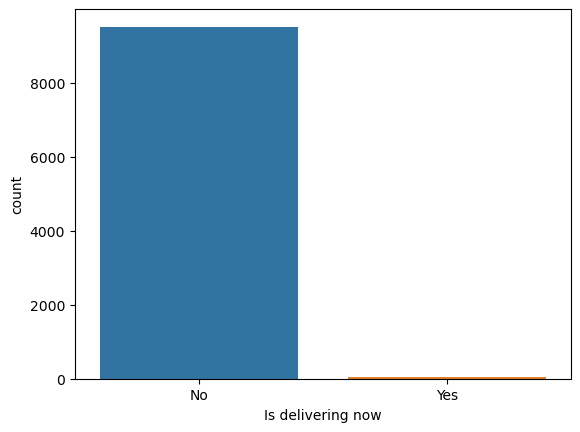

In [82]:
sns.countplot(df['Is delivering now'])

Almost maximum hotel are not delivering now.

<AxesSubplot:xlabel='Price range', ylabel='count'>

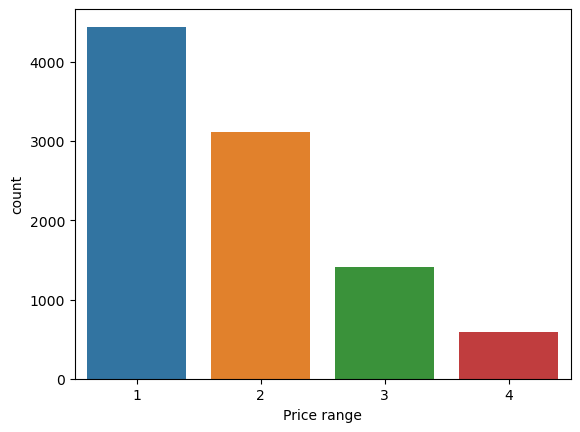

In [83]:
sns.countplot(df['Price range'])

1 Type of price range is in most of the hotels  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.8'),
  Text(2, 0, '1.9'),
  Text(3, 0, '2.0'),
  Text(4, 0, '2.1'),
  Text(5, 0, '2.2'),
  Text(6, 0, '2.3'),
  Text(7, 0, '2.4'),
  Text(8, 0, '2.5'),
  Text(9, 0, '2.6'),
  Text(10, 0, '2.7'),
  Text(11, 0, '2.8'),
  Text(12, 0, '2.9'),
  Text(13, 0, '3.0'),
  Text(14, 0, '3.1'),
  Text(15, 0, '3.2'),
  Text(16, 0, '3.3'),
  Text(17, 0, '3.4'),
  Text(18, 0, '3.5'),
  Text(19, 0, '3.6'),
  Text(20, 0, '3.7'),
  Text(21, 0, '3.8'),
  Text(22, 0, '3.9'),
  Text(23, 0, '4.0'),
  Text(24, 0, '4.1'),
  Text(25, 0, '4.2'),
  Text(26, 0, '4.3'),
  Text(27, 0, '4.4'),
  Text(28, 0, '4.5'),
  Text(29, 0, '4.6'),
  Text(30, 0, '4.7'),
  Text(31, 0, '4.8'),
  Text(32, 0, '4.9')])

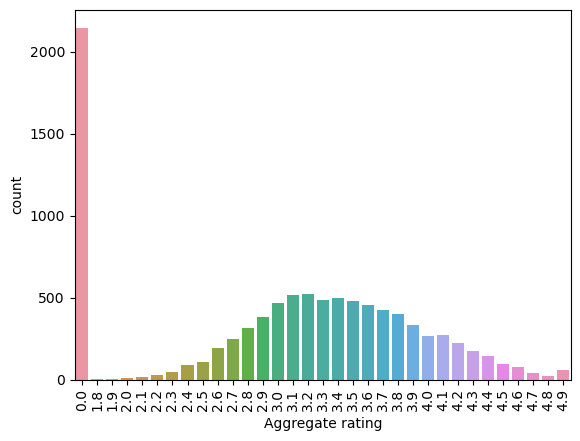

In [84]:
sns.countplot(df['Aggregate rating'])
plt.xticks(rotation=90)

Most of the hotels are with rating 3.2 and very less hotel we can see with 4.8 rating which means most of the hotel are average in terms of rating

<AxesSubplot:xlabel='Rating color', ylabel='count'>

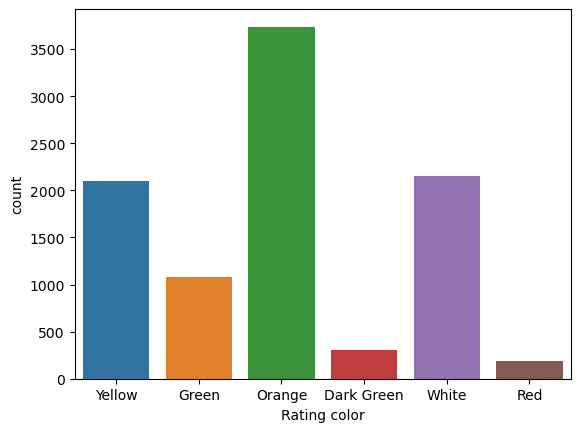

In [85]:
sns.countplot(df['Rating color'])

Orange color rating are maximum among all the colors.

<AxesSubplot:xlabel='Rating text', ylabel='count'>

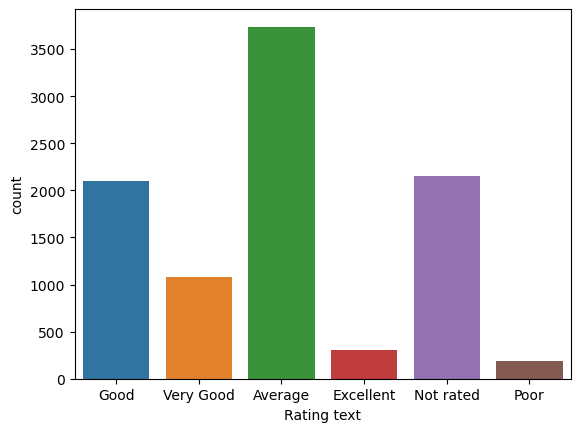

In [41]:
sns.countplot(df['Rating text'])

most of the ratings are Average ratings.

<AxesSubplot:xlabel='Votes', ylabel='Count'>

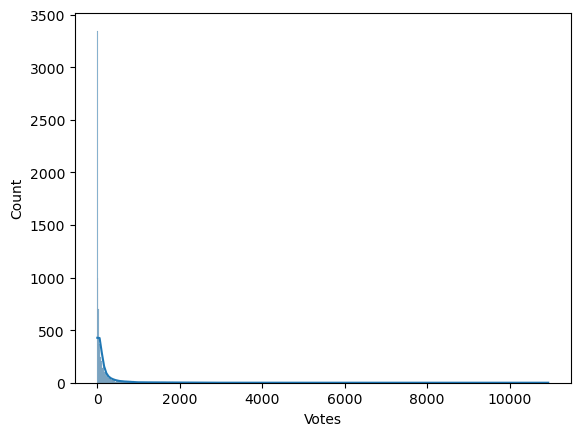

In [42]:
sns.histplot(df['Votes'],kde=True)

No of ratings casted by the peoples is in the range of 0 to 10,500.

<AxesSubplot:xlabel='Average Cost for two', ylabel='Density'>

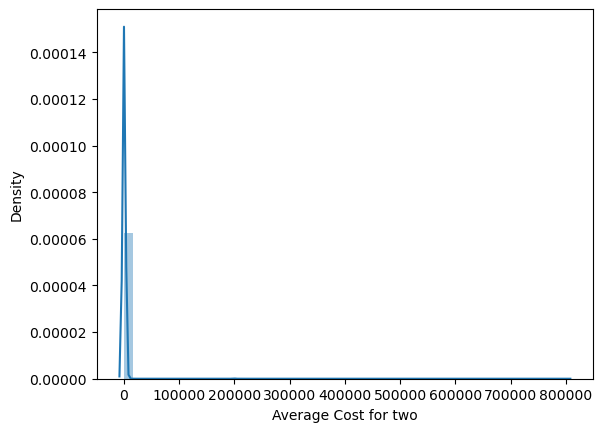

In [43]:
sns.distplot(df['Average Cost for two'])

In [44]:
df['Average Cost for two'].value_counts().head(40)

500     900
300     897
400     857
200     687
600     652
250     461
350     457
700     403
150     367
100     353
800     347
450     335
1000    281
1500    190
550     183
650     177
25      174
1200    145
10      128
40      115
2000    110
900     109
1100     80
1600     78
1400     78
1300     68
1800     68
750      68
50       55
850      55
2500     54
3000     41
70       35
1700     31
2200     27
20       25
30       24
950      21
80       19
60       19
Name: Average Cost for two, dtype: int64

From the ditribution plot & value count function result it is very much clear that most of the hotels average cost for two is bw 0 to 2000 and we can say that this column contains a lot of outliers.

# Bivariate analysis-

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Phillipines'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'UAE'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

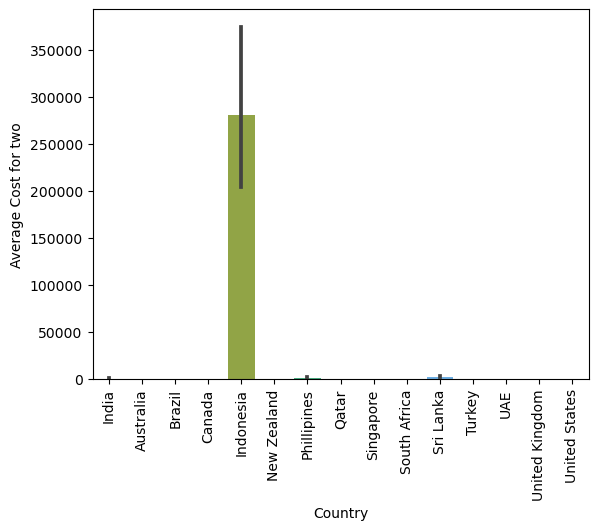

In [45]:
sns.barplot(x='Country',y='Average Cost for two',data=df)
plt.xticks(rotation=90)

Average Cost for two is highest for Indonesia.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Indian Rupees(Rs.)'),
  Text(1, 0, 'Dollar($)'),
  Text(2, 0, 'Brazilian Real(R$)'),
  Text(3, 0, 'Indonesian Rupiah(IDR)'),
  Text(4, 0, 'NewZealand($)'),
  Text(5, 0, 'Botswana Pula(P)'),
  Text(6, 0, 'Qatari Rial(QR)'),
  Text(7, 0, 'Rand(R)'),
  Text(8, 0, 'Sri Lankan Rupee(LKR)'),
  Text(9, 0, 'Turkish Lira(TL)'),
  Text(10, 0, 'Emirati Diram(AED)'),
  Text(11, 0, 'Pounds(\x8c£)')])

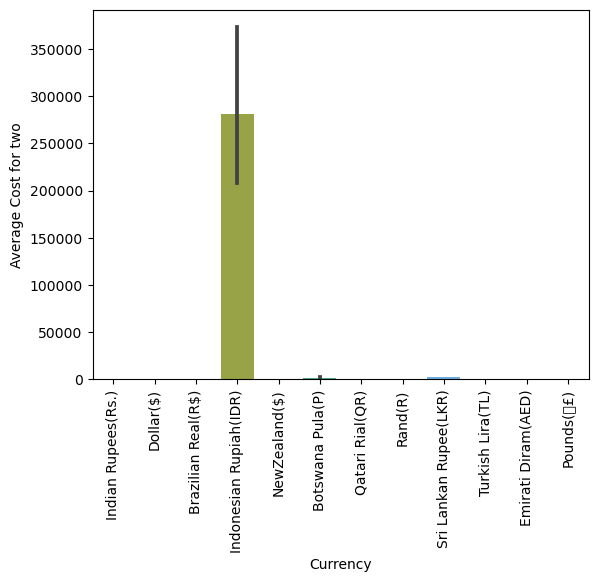

In [46]:
sns.barplot(x='Currency',y='Average Cost for two',data=df)
plt.xticks(rotation=90)

Indonesian currency has the highest average cost for two.

<AxesSubplot:xlabel='Has Table booking', ylabel='Average Cost for two'>

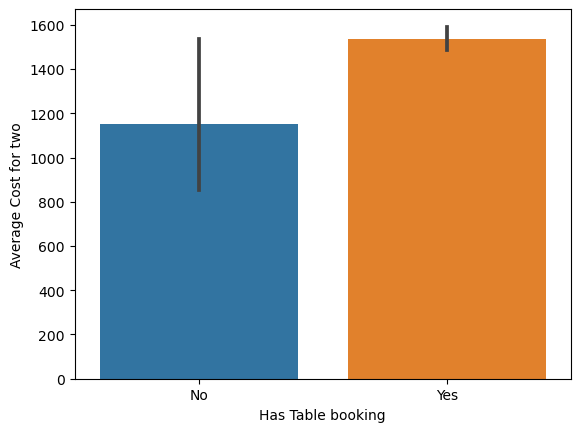

In [47]:
sns.barplot(x='Has Table booking',y='Average Cost for two',data=df)

Hotels having table booking facility have high Average cost for two.

<AxesSubplot:xlabel='Has Online delivery', ylabel='Average Cost for two'>

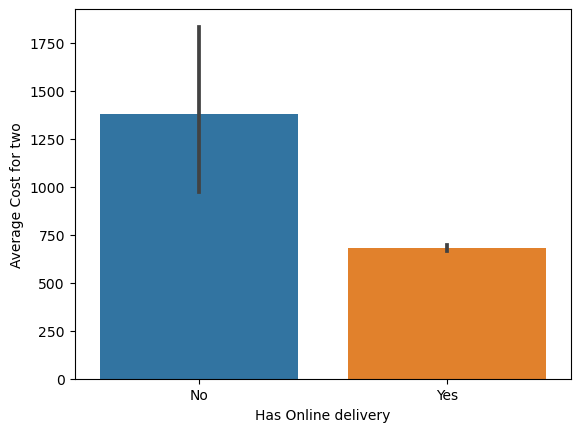

In [48]:
sns.barplot(x='Has Online delivery',y='Average Cost for two',data=df)

Hotels do not having online delivery facility have high Average cost for two.

<AxesSubplot:xlabel='Is delivering now', ylabel='Average Cost for two'>

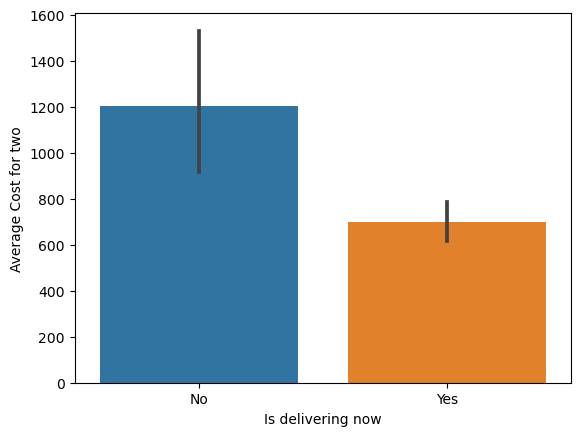

In [49]:
sns.barplot(x='Is delivering now',y='Average Cost for two',data=df)

Hotels do not delivering now have high Average cost for two.

<AxesSubplot:xlabel='Price range', ylabel='Average Cost for two'>

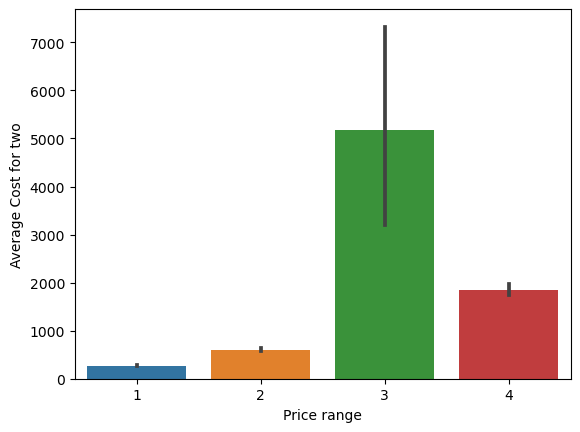

In [50]:
sns.barplot(x='Price range',y='Average Cost for two',data=df)

For price range type 3 the average cost for two is highest.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.8'),
  Text(2, 0, '1.9'),
  Text(3, 0, '2.0'),
  Text(4, 0, '2.1'),
  Text(5, 0, '2.2'),
  Text(6, 0, '2.3'),
  Text(7, 0, '2.4'),
  Text(8, 0, '2.5'),
  Text(9, 0, '2.6'),
  Text(10, 0, '2.7'),
  Text(11, 0, '2.8'),
  Text(12, 0, '2.9'),
  Text(13, 0, '3.0'),
  Text(14, 0, '3.1'),
  Text(15, 0, '3.2'),
  Text(16, 0, '3.3'),
  Text(17, 0, '3.4'),
  Text(18, 0, '3.5'),
  Text(19, 0, '3.6'),
  Text(20, 0, '3.7'),
  Text(21, 0, '3.8'),
  Text(22, 0, '3.9'),
  Text(23, 0, '4.0'),
  Text(24, 0, '4.1'),
  Text(25, 0, '4.2'),
  Text(26, 0, '4.3'),
  Text(27, 0, '4.4'),
  Text(28, 0, '4.5'),
  Text(29, 0, '4.6'),
  Text(30, 0, '4.7'),
  Text(31, 0, '4.8'),
  Text(32, 0, '4.9')])

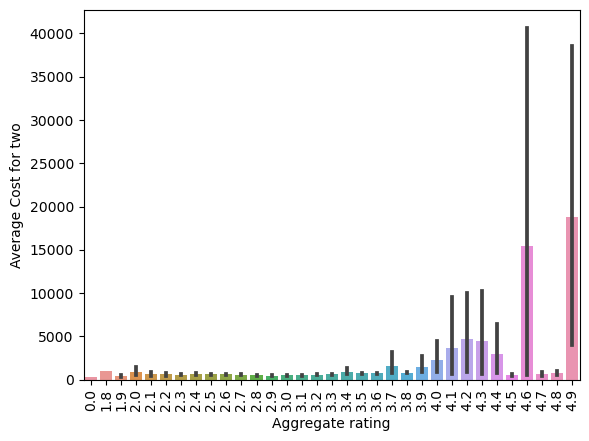

In [51]:
sns.barplot(x='Aggregate rating',y='Average Cost for two',data=df)
plt.xticks(rotation=90)

The average cost for two is highest for the hotels having rating 4.6 & 4.9 which means hotels having high ratings do have high average cost for two.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Yellow'),
  Text(1, 0, 'Green'),
  Text(2, 0, 'Orange'),
  Text(3, 0, 'Dark Green'),
  Text(4, 0, 'White'),
  Text(5, 0, 'Red')])

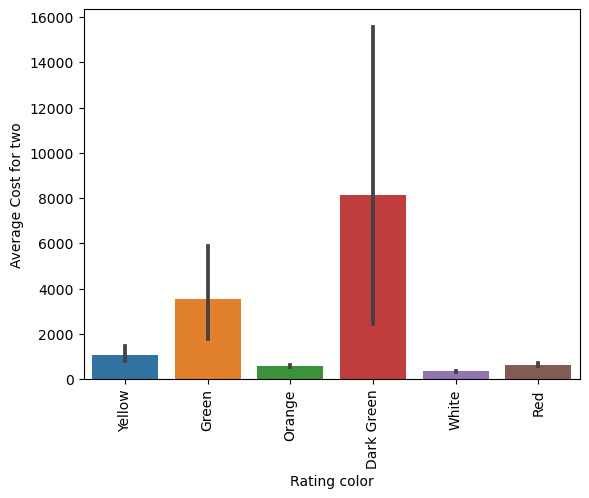

In [52]:
sns.barplot(x='Rating color',y='Average Cost for two',data=df)
plt.xticks(rotation=90)

Average cost for two is highest for the Dark green colur rating.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Good'),
  Text(1, 0, 'Very Good'),
  Text(2, 0, 'Average'),
  Text(3, 0, 'Excellent'),
  Text(4, 0, 'Not rated'),
  Text(5, 0, 'Poor')])

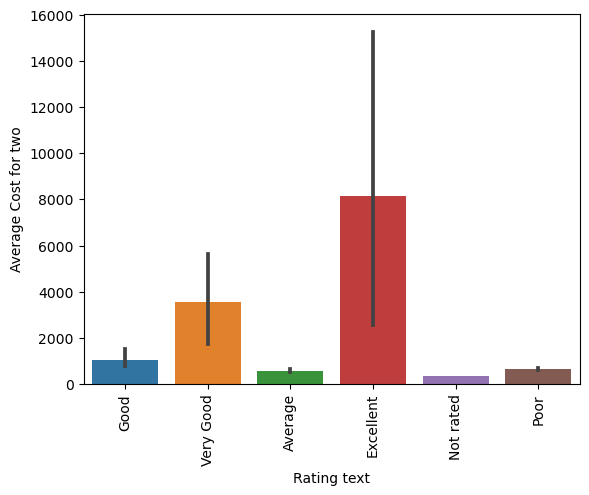

In [53]:
sns.barplot(x='Rating text',y='Average Cost for two',data=df)
plt.xticks(rotation=90)

Average cost for two is highest for the Dark excellent rating.

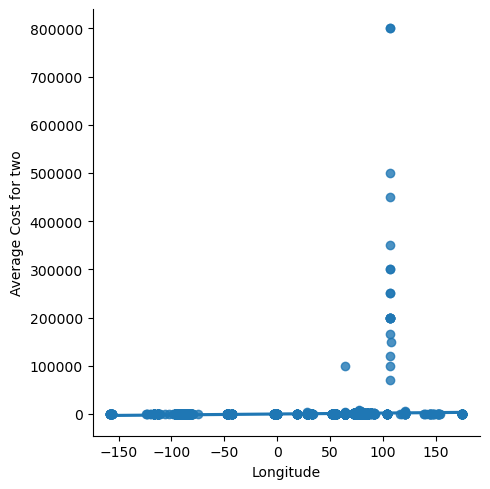

In [54]:
sns.lmplot(x='Longitude',y='Average Cost for two',data=df)

There is not much but a little positive relationship can be seen bw Average Cost for two & longitude.

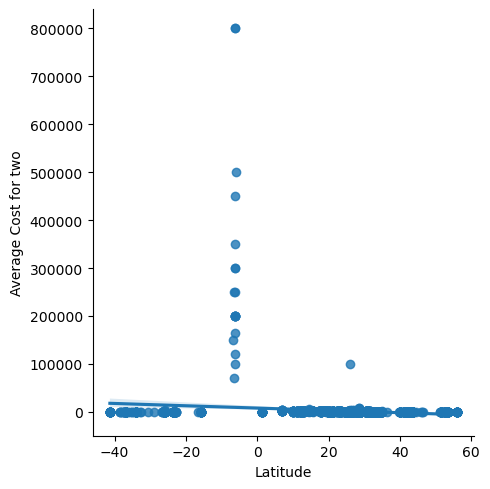

In [55]:
sns.lmplot(x='Latitude',y='Average Cost for two',data=df)

There is not much but a little negetive relationship can be seen bw Average Cost for two & longitude.

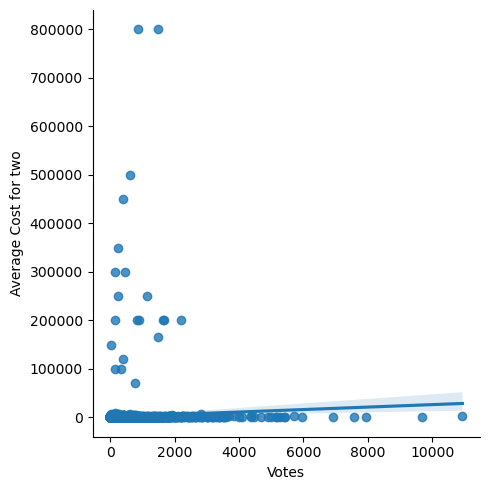

In [56]:
sns.lmplot(x='Votes',y='Average Cost for two',data=df)

There is not much but a little positive relationship can be seen bw Average Cost for two & no of ratings casted by peoples.

In [57]:
df.groupby('Cuisines').mean()

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Cuisines,,,,,,
Afghani,77.145669,28.507631,512.5,1.75,0.725,9.75
"Afghani, Mughlai, Chinese",77.245796,28.558387,500.0,2.00,0.000,2.00
"Afghani, North Indian",77.045289,28.439285,900.0,2.00,0.000,0.00
"Afghani, North Indian, Pakistani, Arabian",77.266754,28.659755,500.0,2.00,0.000,3.00
African,28.236047,-25.770748,450.0,4.00,4.700,373.00
...,...,...,...,...,...,...
"Western, Asian, Cafe",106.911335,-6.163948,250000.0,3.00,4.200,259.00
"Western, Fusion, Fast Food",103.858430,1.301707,60.0,4.00,3.200,32.00
World Cuisine,32.869800,39.898239,80.0,3.00,4.900,95.00


In [58]:
df.groupby('Cuisines').mean()['Average Cost for two'].sort_values(ascending=False)

Cuisines
Asian, Indonesian, Western                                    800000.0
French, Western                                               350000.0
Cafe, Western                                                 300000.0
Indonesian                                                    300000.0
Sushi, Japanese                                               250060.0
                                                                ...   
Burger, Coffee and Tea, Modern Australian                          7.0
Desserts, Pizza, Ice Cream                                         0.0
Indian, Chinese, Continental                                       0.0
Cafe, Italian, Mexican, North Indian, Continental                  0.0
Cafe, Continental, Desserts, Ice Cream, Italian, Beverages         0.0
Name: Average Cost for two, Length: 1825, dtype: float64

Average Cost for two is highest for cuisines.

In [59]:
df.groupby('Locality').mean()['Average Cost for two'].sort_values(ascending=False)

Locality
Hotel Shangri-La, Sudirman       800000.0
Grand Indonesia Mall, Thamrin    500000.0
Penjaringan                      500000.0
Thamrin                          350000.0
Plaza Festival, Kuningan         300000.0
                                   ...   
Inverloch                             7.0
Dicky Beach                           7.0
Lava Hot Springs                      5.0
Miller                                0.0
Parade                                0.0
Name: Average Cost for two, Length: 1208, dtype: float64

Average Cost for two is highest for Hotel Shangri-La, Sudirman locality.

In [60]:
df.groupby('Aggregate rating').mean()['Average Cost for two'].sort_values(ascending=False)

Aggregate rating
4.9    18833.442623
4.6    15455.128205
4.2     4664.072398
4.3     4430.718391
4.1     3669.543796
4.4     2983.055556
4.0     2256.484962
3.7     1623.854801
3.9     1511.417910
1.8     1000.000000
2.0      892.857143
3.4      824.236948
3.8      792.835000
4.8      727.000000
3.5      726.270833
3.6      717.482533
2.4      670.919540
2.1      633.333333
2.5      622.272727
3.3      608.664596
2.6      601.675393
2.2      599.074074
4.7      597.380952
3.2      575.124521
2.3      565.957447
2.7      546.800000
4.5      542.263158
3.1      490.414258
2.8      480.190476
3.0      473.717949
2.9      450.446194
1.9      375.000000
0.0      340.337523
Name: Average Cost for two, dtype: float64

Average Cost for two is highest for 4.9 rating.

In [61]:
df.groupby('City').mean()['Average Cost for two'].sort_values(ascending=False)

City
Jakarta           308437.500000
Tangerang         250000.000000
Bogor             160000.000000
Bandung           150000.000000
Pasay City          3333.333333
                      ...      
Mc Millan             10.000000
Inverloch              7.000000
Lakes Entrance         7.000000
Dicky Beach            7.000000
Miller                 0.000000
Name: Average Cost for two, Length: 141, dtype: float64

Average Cost for two is highest for jakarta city.

In [62]:
df.groupby('Restaurant Name').mean()['Average Cost for two'].sort_values(ascending=False)

Restaurant Name
Skye                           800000.0
Satoo - Hotel Shangri-La       800000.0
Sushi Masa                     500000.0
3 Wise Monkeys                 450000.0
Avec Moi Restaurant and Bar    350000.0
                                 ...   
HI Lite Bar & Lounge                0.0
The BrewMaster                      0.0
The Latitude - Radisson Blu         0.0
Royal Hotel                         0.0
VNS Live Studio                     0.0
Name: Average Cost for two, Length: 7446, dtype: float64

Average cost for two is highest for skye restaurant.

# Heatmap (Correlation matrics)-

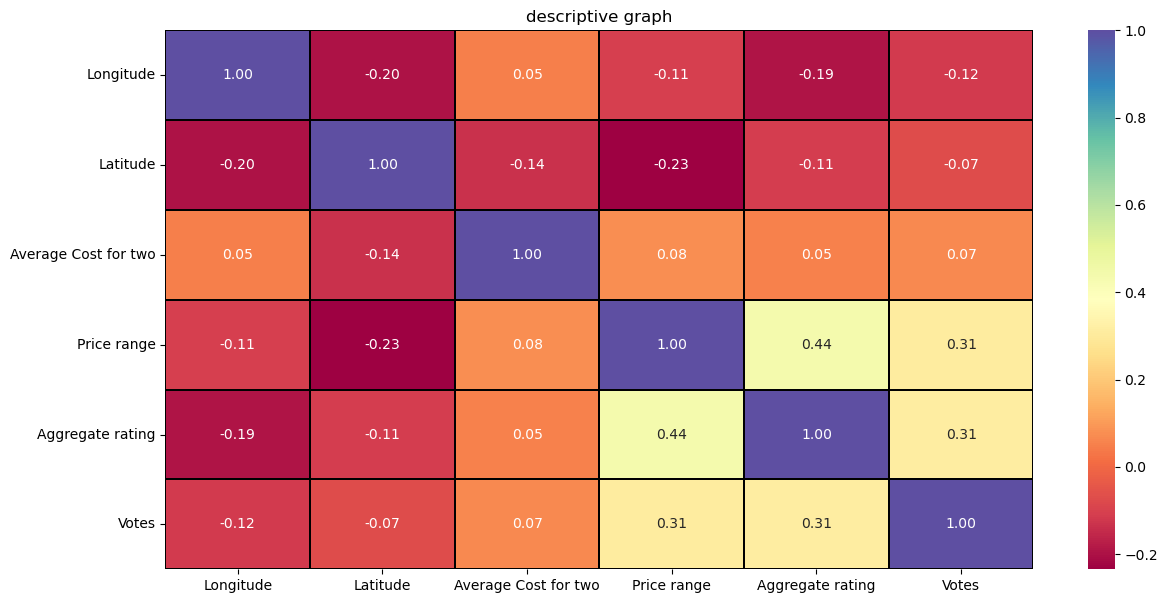

In [86]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='Black',cmap='Spectral')
plt.title('descriptive graph')
plt.show()

# Observations-

1. Latitude & longitude has 20% negetive correlationship with each other.
2. Aggregate rating & longitude has negetive correlationship with each other.
3. Votes & price range has 31% positive correlationship with each other.
4. Votes & aggregate rating has 31% positive correlationship with each other.
5. Price & aggregate rating has 44% positive correlationship with each other.
6. Latitude & price range has 23% negetive correlationship with each other.

# Checking data distribution-

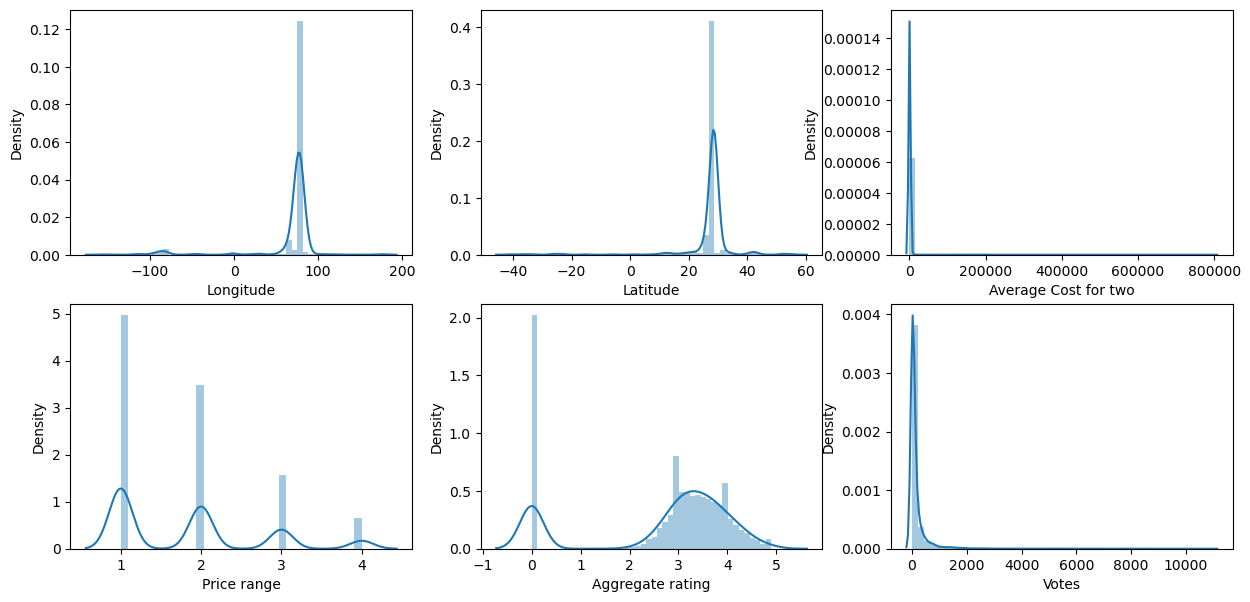

In [87]:
plt.figure(figsize=(15,7))
plotnumber=1


for column in continous:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show()   

In [88]:
#Dropping average cost for two from continous list as this is our target variable-

In [89]:
continous.pop(2)

'Average Cost for two'

In [90]:
df[continous].skew()

Longitude          -3.488765
Latitude           -4.574672
Price range         0.889618
Aggregate rating   -0.954130
Votes               8.807637
dtype: float64

Here we can see that skewness is more than acceptable range in all the columns having continous data shown above in the distribution. we are not worried about the skewness in price range column as this is a categorical data column.

# Removal of skewness through Power transformer method-

In [91]:
from sklearn.preprocessing import PowerTransformer

In [92]:
features=['Longitude','Latitude','Aggregate rating','Votes']

In [93]:
x=PowerTransformer(method='yeo-johnson') 
df[features]=x.fit_transform(df[features].values)

In [94]:
df[continous].skew()

Longitude           0.004543
Latitude            0.871067
Price range         0.889618
Aggregate rating   -0.610806
Votes              -0.004029
dtype: float64

Here now we can see that the skewness has been reduced 

# Checking data distribution again-

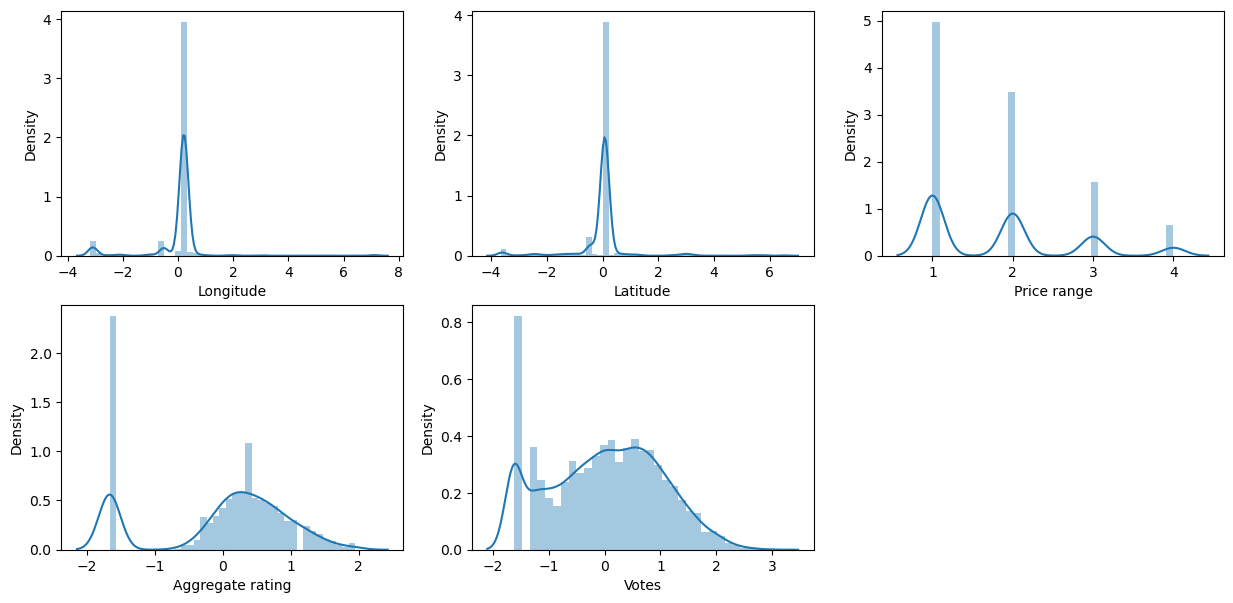

In [95]:
plt.figure(figsize=(15,7))
plotnumber=1


for column in continous:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show()  

Now we can see that skewness has been reduced as distribution has become better than before.

# Checking for outliers-

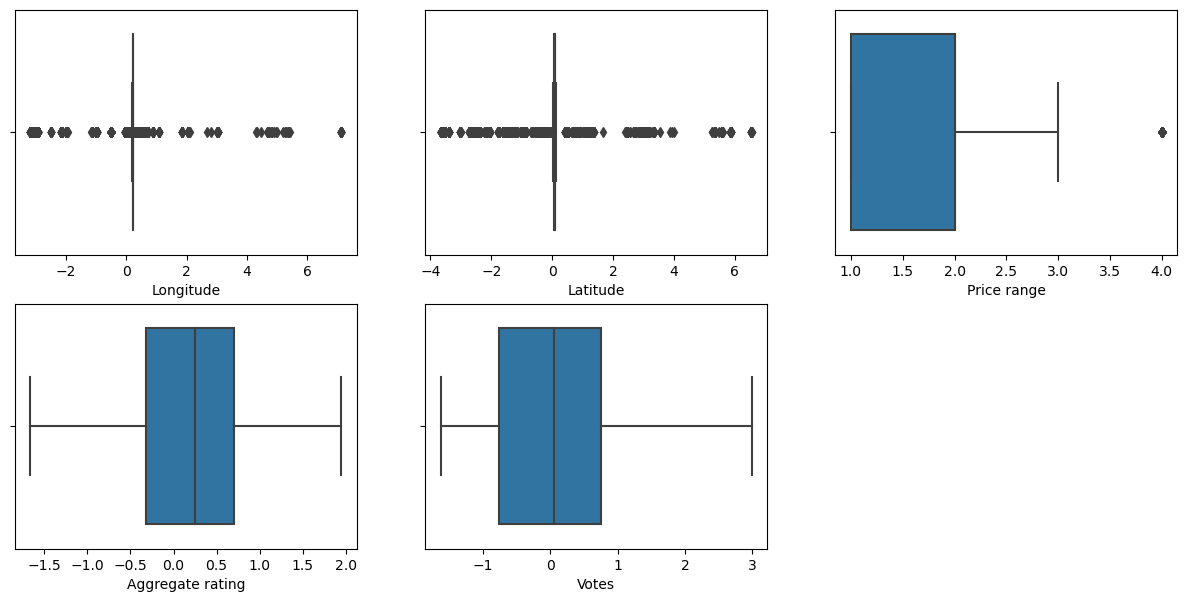

In [96]:
plt.figure(figsize=(15,7))
plotnumber=1


for column in continous:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show()

Here we can see that both longitude & latitude column has outliers.

# Outliers removal through IQR method-

In [97]:
df.shape

(9551, 20)

In [98]:
df.columns

Index(['Country', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [99]:
#upper side outliers-q3+(1.5*IQR)
#lower side outliers-q1-(1.5*IQR)


q1=df.quantile(0.25)
q3=df.quantile(0.75)

IQR=q3-q1

In [100]:
Longitude_age=(q3['Longitude']+(1.5*IQR['Longitude']))


index=np.where(df['Longitude']> Longitude_age)

df=df.drop(df.index[index])
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1,India,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",-0.513841,-0.422250,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,0.513034,Yellow,Good,0.458460
5,India,MoMo Cafe,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",-0.513841,-0.422250,"North Indian, European",2000,Indian Rupees(Rs.),No,No,No,No,4,0.990620,Green,Very Good,0.237349
8,India,G Thal,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",-0.513841,-0.422250,"Rajasthani, Gujarati, Mughlai",800,Indian Rupees(Rs.),No,No,No,No,3,0.605473,Yellow,Good,0.368395
14,India,Bon Barbecue,Agra,"Parador Hotel, 3A-3B, Phase 1, Fatehabad Road,...",Tajganj,"Tajganj, Agra",-0.513841,-0.422250,"North Indian, Chinese, Continental",1500,Indian Rupees(Rs.),No,No,No,No,4,0.794985,Yellow,Good,0.351660
15,India,Chapter 1 Cafe,Agra,"1374 K/1375 K, 2nd floor, Dinesh Nagar, Fatehb...",Tajganj,"Tajganj, Agra",-0.513841,-0.422250,"Cafe, Italian, Mexican, North Indian, Continental",0,Indian Rupees(Rs.),No,No,No,No,1,0.892040,Yellow,Good,0.616055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,United States,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-3.114864,3.061284,"American, Bar Food",10,Dollar($),No,No,No,No,1,0.699460,Yellow,Good,0.630847
9547,United States,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-3.114864,3.061170,Thai,10,Dollar($),No,No,No,No,1,0.513034,Yellow,Good,0.360098
9548,United States,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-3.114849,3.053485,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,No,2,0.892040,Yellow,Good,0.844893
9549,United States,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-3.100074,2.568751,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,No,2,0.892040,Yellow,Good,0.844893


In [101]:
Latitude_age=(q3['Latitude']+(1.5*IQR['Latitude']))


index=np.where(df['Latitude']> Latitude_age)

df=df.drop(df.index[index])
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1,India,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",-0.513841,-0.422250,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,0.513034,Yellow,Good,0.458460
5,India,MoMo Cafe,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",-0.513841,-0.422250,"North Indian, European",2000,Indian Rupees(Rs.),No,No,No,No,4,0.990620,Green,Very Good,0.237349
8,India,G Thal,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",-0.513841,-0.422250,"Rajasthani, Gujarati, Mughlai",800,Indian Rupees(Rs.),No,No,No,No,3,0.605473,Yellow,Good,0.368395
14,India,Bon Barbecue,Agra,"Parador Hotel, 3A-3B, Phase 1, Fatehabad Road,...",Tajganj,"Tajganj, Agra",-0.513841,-0.422250,"North Indian, Chinese, Continental",1500,Indian Rupees(Rs.),No,No,No,No,4,0.794985,Yellow,Good,0.351660
15,India,Chapter 1 Cafe,Agra,"1374 K/1375 K, 2nd floor, Dinesh Nagar, Fatehb...",Tajganj,"Tajganj, Agra",-0.513841,-0.422250,"Cafe, Italian, Mexican, North Indian, Continental",0,Indian Rupees(Rs.),No,No,No,No,1,0.892040,Yellow,Good,0.616055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,United States,Datz,Tampa Bay,"2616 S Macdill Avenue, Tampa, FL 33629",Palma Ceia,"Palma Ceia, Tampa Bay",-3.102596,-0.043904,"Desserts, Bar Food",40,Dollar($),No,No,No,No,3,1.722744,Dark Green,Excellent,2.339448
9504,United States,Ella's Americana Folk Art Cafe,Tampa Bay,"5119 N Nebraska Ave, Tampa, FL 33603",Seminole Heights,"Seminole Heights, Tampa Bay",-3.102542,-0.030486,"International, Italian, Southern",40,Dollar($),No,No,No,No,3,1.833264,Dark Green,Excellent,2.043881
9505,United States,Taco Bus,Tampa Bay,"913 E Hillsborough Ave, Tampa, FL 33604",Seminole Heights,"Seminole Heights, Tampa Bay",-3.102540,-0.030052,"Mexican, Vegetarian",10,Dollar($),No,No,No,No,1,1.506121,Dark Green,Excellent,2.087081
9506,United States,The Refinery,Tampa Bay,"5137 N. Florida Ave., Tampa, FL 33603",Seminole Heights,"Seminole Heights, Tampa Bay",-3.102552,-0.030450,"Seafood, Steak",40,Dollar($),No,No,No,No,3,0.990620,Green,Very Good,1.704704


In [102]:
Longitude_low=q1.Longitude-(1.5*IQR.Longitude)

index=np.where(df['Longitude']<Longitude_low)

df=df.drop(df.index[index])
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
117,India,Onesta,Bangalore,"215, 216 & 220, Devasandra Village, Kasaba Hob...",New BEL Road,"New BEL Road, Bangalore",0.233945,-2.369542,"Pizza, Cafe, Italian",600,Indian Rupees(Rs.),No,No,No,No,2,1.613695,Dark Green,Excellent,1.537416
122,India,Black N White Cafe,Bhopal,"G-1, Raksha Tower, Eden Garden, Arera Colony, ...",Arera Colony,"Arera Colony, Bhopal",0.225180,-0.881395,"Cafe, Chinese, North Indian",200,Indian Rupees(Rs.),No,No,No,No,1,0.332826,Orange,Average,0.297786
124,India,Sagar Gaire Fast Food,Bhopal,"10, Number Market, Arera Colony, Bhopal",Arera Colony,"Arera Colony, Bhopal",0.226102,-0.880929,Fast Food,250,Indian Rupees(Rs.),No,No,No,No,1,1.945248,Dark Green,Excellent,1.345193
125,India,The Kasbah,Bhopal,"110/7, Mandakini, Opposite Union Bank, Kolar M...",Arera Colony,"Arera Colony, Bhopal",0.225054,-0.885863,"North Indian, Chinese",700,Indian Rupees(Rs.),No,No,No,No,2,0.892040,Yellow,Good,0.739563
126,India,Bake N Shake,Bhopal,"B-1, GM Tower, Stop No. 10, Arera Colony, Bhopal",Arera Colony,"Arera Colony, Bhopal",0.226080,-0.880902,Fast Food,500,Indian Rupees(Rs.),No,No,No,No,2,1.192320,Green,Very Good,1.021779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8484,India,Sky Grill,Noida,"2nd Floor, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",0.222182,0.075696,"North Indian, Chinese",700,Indian Rupees(Rs.),No,Yes,No,No,2,-0.247920,Orange,Average,0.102820
8485,India,Bread & Pasta,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",0.222169,0.075770,Fast Food,400,Indian Rupees(Rs.),No,No,No,No,1,-1.661470,White,Not rated,-1.290417
8486,India,Chillies Cafe,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",0.222163,0.075754,Fast Food,600,Indian Rupees(Rs.),No,No,No,No,2,-1.661470,White,Not rated,-0.955625
8487,India,Platters,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",0.222170,0.075770,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,-1.661470,White,Not rated,-1.623553


In [103]:
Latitude_low=q1.Latitude-(1.5*IQR.Latitude)

index=np.where(df['Latitude']<Latitude_low)

df=df.drop(df.index[index])
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
241,India,Desire Foods,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",0.218665,0.062926,"Chinese, Fast Food, Bakery",250,Indian Rupees(Rs.),No,No,No,No,1,-0.008660,Orange,Average,-0.847493
242,India,Knight Rock,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",0.218557,0.062945,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,-0.090035,Orange,Average,-0.251389
243,India,Punjab Restaurant,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",0.218603,0.062941,North Indian,150,Indian Rupees(Rs.),No,No,No,No,1,-0.090035,Orange,Average,-0.561831
244,India,Raju Dhaba,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",0.218634,0.062934,North Indian,150,Indian Rupees(Rs.),No,No,No,No,1,-0.008660,Orange,Average,-0.561831
245,India,Rakheja Bakery,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",0.218613,0.062927,Bakery,100,Indian Rupees(Rs.),No,No,No,No,1,-0.090035,Orange,Average,-0.619170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8484,India,Sky Grill,Noida,"2nd Floor, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",0.222182,0.075696,"North Indian, Chinese",700,Indian Rupees(Rs.),No,Yes,No,No,2,-0.247920,Orange,Average,0.102820
8485,India,Bread & Pasta,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",0.222169,0.075770,Fast Food,400,Indian Rupees(Rs.),No,No,No,No,1,-1.661470,White,Not rated,-1.290417
8486,India,Chillies Cafe,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",0.222163,0.075754,Fast Food,600,Indian Rupees(Rs.),No,No,No,No,2,-1.661470,White,Not rated,-0.955625
8487,India,Platters,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",0.222170,0.075770,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,-1.661470,White,Not rated,-1.623553


We have lost 21% data here but we can afford to lose the data here as we have good amount of data with us but we cant afford to have outliers which will effect our model in terms of overfitting. 

# Checking outliers again-

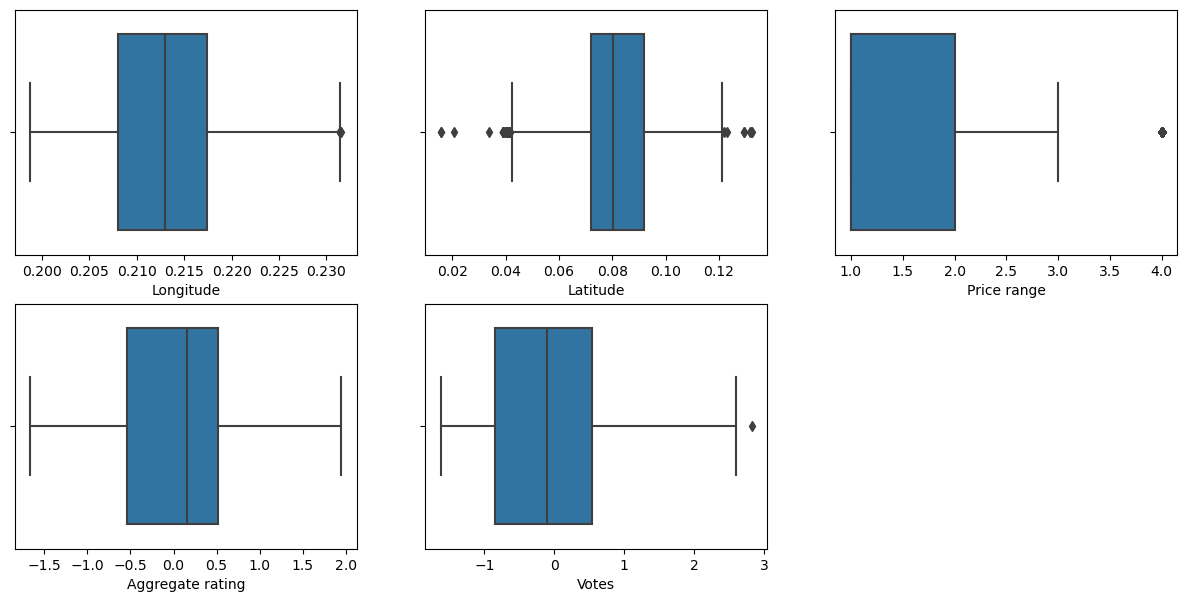

In [104]:
plt.figure(figsize=(15,7))
plotnumber=1


for column in continous:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show()

Now we can see that outliers has been reduced.

# Multivariate analysis-

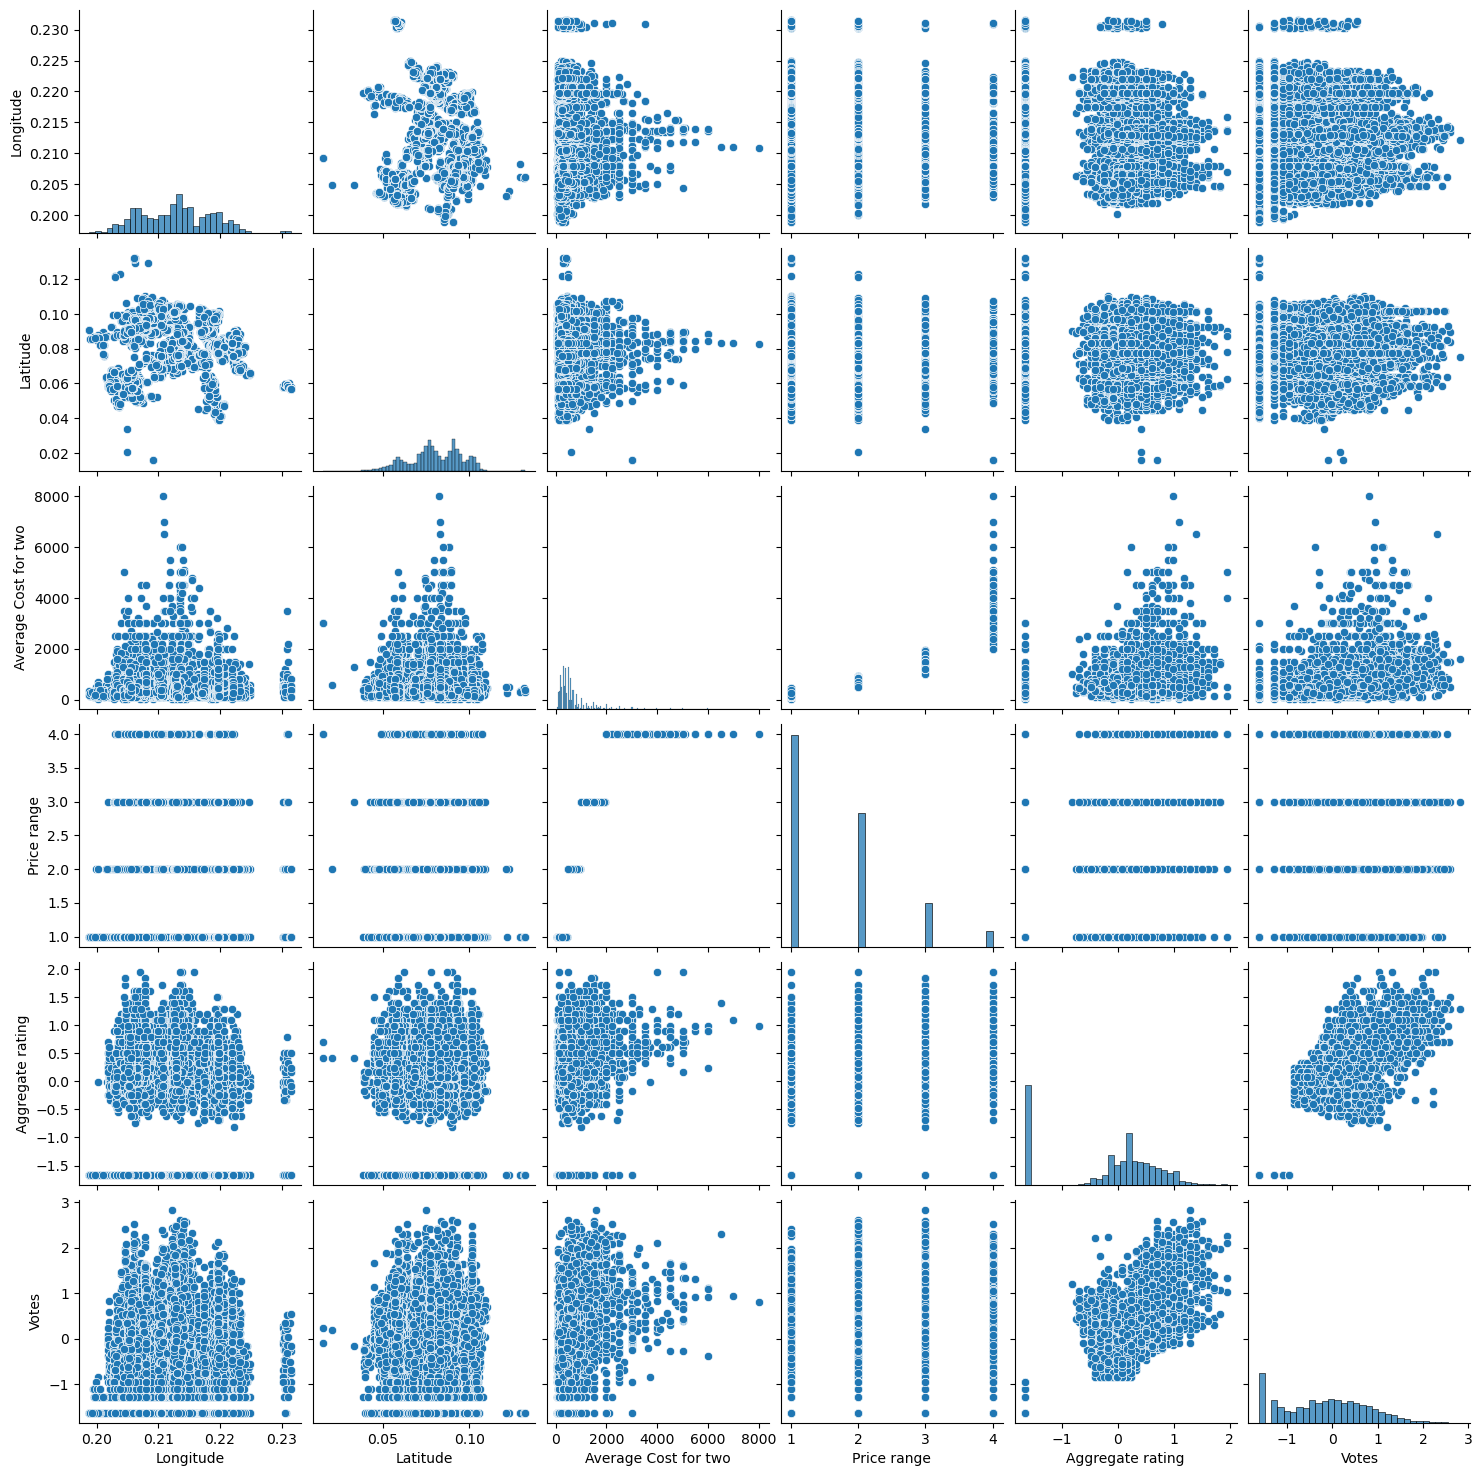

In [105]:
sns.pairplot(df)

In [106]:
df.corr()

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Longitude,1.000000,0.089927,-0.044183,-0.047127,-0.063183,-0.046977
Latitude,0.089927,1.000000,-0.097371,-0.129539,-0.035651,-0.029958
Average Cost for two,-0.044183,-0.097371,1.000000,0.848207,0.350118,0.433809
Price range,-0.047127,-0.129539,0.848207,1.000000,0.388591,0.501776
Aggregate rating,-0.063183,-0.035651,0.350118,0.388591,1.000000,0.841573
Votes,-0.046977,-0.029958,0.433809,0.501776,0.841573,1.000000


# Observations-

1. A negetive correlationship can be seen bw Price range & latitude.
2. A good positive correlationship can be seen bw aggregate rating & votes.
3. A positive correlationship can be seen bw votes & average cost for two.
4. A positive correlationship can be seen bw votes & Price range.
5. A positive correlationship can be seen bw Aggregate rating & average cost for two.

In [107]:
#Dropping unecessary columns-

In [108]:
df=df.drop(columns=['Restaurant Name','Address','Locality Verbose'],axis=1)

Restaurant Name,Address,Locality Verbose has so many categories with in and do not have much impact on our target variable so we can drop it.

In [109]:
object

['Country',
 'Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [110]:
object.pop(1)

'Restaurant Name'

In [111]:
object

['Country',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [112]:
object.pop(2)

'Address'

In [113]:
object

['Country',
 'City',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [114]:
object.pop(3)

'Locality Verbose'

In [115]:
object

['Country',
 'City',
 'Locality',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

# Encoding of the object data-

In [116]:
#Applying label encoder on taget variable & features having less categories-

In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
le= LabelEncoder()

In [119]:
df1=le.fit_transform(df['Has Table booking'])
pd.Series(df1)

0       0
1       0
2       0
3       0
4       0
       ..
7544    0
7545    0
7546    0
7547    0
7548    0
Length: 7549, dtype: int32

In [120]:
df2=le.fit_transform(df['Has Online delivery'])
pd.Series(df2)

0       0
1       0
2       0
3       0
4       0
       ..
7544    1
7545    0
7546    0
7547    0
7548    0
Length: 7549, dtype: int32

In [121]:
df3=le.fit_transform(df['Is delivering now'])
pd.Series(df3)

0       0
1       0
2       0
3       0
4       0
       ..
7544    0
7545    0
7546    0
7547    0
7548    0
Length: 7549, dtype: int32

In [122]:
df['Has Table booking']=df1

In [123]:
df['Has Online delivery']=df2

In [124]:
df['Is delivering now']=df3

In [125]:
df

,Country,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
241,India,Faridabad,Badarpur Border,0.218665,0.062926,"Chinese, Fast Food, Bakery",250,Indian Rupees(Rs.),0,0,0,No,1,-0.008660,Orange,Average,-0.847493
242,India,Faridabad,Badarpur Border,0.218557,0.062945,"North Indian, Chinese",500,Indian Rupees(Rs.),0,0,0,No,2,-0.090035,Orange,Average,-0.251389
243,India,Faridabad,Badarpur Border,0.218603,0.062941,North Indian,150,Indian Rupees(Rs.),0,0,0,No,1,-0.090035,Orange,Average,-0.561831
244,India,Faridabad,Badarpur Border,0.218634,0.062934,North Indian,150,Indian Rupees(Rs.),0,0,0,No,1,-0.008660,Orange,Average,-0.561831
245,India,Faridabad,Badarpur Border,0.218613,0.062927,Bakery,100,Indian Rupees(Rs.),0,0,0,No,1,-0.090035,Orange,Average,-0.619170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8484,India,Noida,"Tulip Mall, Sector 48, Noida",0.222182,0.075696,"North Indian, Chinese",700,Indian Rupees(Rs.),0,1,0,No,2,-0.247920,Orange,Average,0.102820
8485,India,Noida,"Tulip Mall, Sector 48, Noida",0.222169,0.075770,Fast Food,400,Indian Rupees(Rs.),0,0,0,No,1,-1.661470,White,Not rated,-1.290417
8486,India,Noida,"Tulip Mall, Sector 48, Noida",0.222163,0.075754,Fast Food,600,Indian Rupees(Rs.),0,0,0,No,2,-1.661470,White,Not rated,-0.955625
8487,India,Noida,"Tulip Mall, Sector 48, Noida",0.222170,0.075770,"North Indian, Chinese",500,Indian Rupees(Rs.),0,0,0,No,2,-1.661470,White,Not rated,-1.623553


In [126]:
df.columns

Index(['Country', 'City', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [127]:
#Here we can see that switch to order menu has only one category so we can drop it as it will not impact our target variable.

In [128]:
df=df.drop(columns=['Switch to order menu'],axis=1)
df

,Country,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
241,India,Faridabad,Badarpur Border,0.218665,0.062926,"Chinese, Fast Food, Bakery",250,Indian Rupees(Rs.),0,0,0,1,-0.008660,Orange,Average,-0.847493
242,India,Faridabad,Badarpur Border,0.218557,0.062945,"North Indian, Chinese",500,Indian Rupees(Rs.),0,0,0,2,-0.090035,Orange,Average,-0.251389
243,India,Faridabad,Badarpur Border,0.218603,0.062941,North Indian,150,Indian Rupees(Rs.),0,0,0,1,-0.090035,Orange,Average,-0.561831
244,India,Faridabad,Badarpur Border,0.218634,0.062934,North Indian,150,Indian Rupees(Rs.),0,0,0,1,-0.008660,Orange,Average,-0.561831
245,India,Faridabad,Badarpur Border,0.218613,0.062927,Bakery,100,Indian Rupees(Rs.),0,0,0,1,-0.090035,Orange,Average,-0.619170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8484,India,Noida,"Tulip Mall, Sector 48, Noida",0.222182,0.075696,"North Indian, Chinese",700,Indian Rupees(Rs.),0,1,0,2,-0.247920,Orange,Average,0.102820
8485,India,Noida,"Tulip Mall, Sector 48, Noida",0.222169,0.075770,Fast Food,400,Indian Rupees(Rs.),0,0,0,1,-1.661470,White,Not rated,-1.290417
8486,India,Noida,"Tulip Mall, Sector 48, Noida",0.222163,0.075754,Fast Food,600,Indian Rupees(Rs.),0,0,0,2,-1.661470,White,Not rated,-0.955625
8487,India,Noida,"Tulip Mall, Sector 48, Noida",0.222170,0.075770,"North Indian, Chinese",500,Indian Rupees(Rs.),0,0,0,2,-1.661470,White,Not rated,-1.623553


In [129]:
#Applying Binary encoding on the columns with many categories-

In [130]:
from category_encoders import BinaryEncoder

In [131]:
be=BinaryEncoder()

In [132]:
be.fit_transform(df['Country'])

,Country_0
241,1
242,1
243,1
244,1
245,1
...,...
8484,1
8485,1
8486,1
8487,1


In [133]:
df[['Country_0']]=be.fit_transform(df['Country'])

In [134]:
be.fit_transform(df['City'])

,City_0,City_1,City_2
241,0,0,1
242,0,0,1
243,0,0,1
244,0,0,1
245,0,0,1
...,...,...,...
8484,1,0,1
8485,1,0,1
8486,1,0,1
8487,1,0,1


In [135]:
df[['City_0','City_1','City_2']]=be.fit_transform(df['City'])

In [136]:
be.fit_transform(df['Locality'])

,Locality_0,Locality_1,Locality_2,Locality_3,Locality_4,Locality_5,Locality_6,Locality_7,Locality_8
241,0,0,0,0,0,0,0,0,1
242,0,0,0,0,0,0,0,0,1
243,0,0,0,0,0,0,0,0,1
244,0,0,0,0,0,0,0,0,1
245,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
8484,1,1,1,0,0,1,0,0,1
8485,1,1,1,0,0,1,0,0,1
8486,1,1,1,0,0,1,0,0,1
8487,1,1,1,0,0,1,0,0,1


In [137]:
df[['Locality_0','Locality_1','Locality_2','Locality_3','Locality_4','Locality_5','Locality_6','Locality_7','Locality_8']]=be.fit_transform(df['Locality'])

In [138]:
be.fit_transform(df['Cuisines'])

,Cuisines_0,Cuisines_1,Cuisines_2,Cuisines_3,Cuisines_4,Cuisines_5,Cuisines_6,Cuisines_7,Cuisines_8,Cuisines_9,Cuisines_10
241,0,0,0,0,0,0,0,0,0,0,1
242,0,0,0,0,0,0,0,0,0,1,0
243,0,0,0,0,0,0,0,0,0,1,1
244,0,0,0,0,0,0,0,0,0,1,1
245,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8484,0,0,0,0,0,0,0,0,0,1,0
8485,0,0,0,0,0,0,1,0,0,1,0
8486,0,0,0,0,0,0,1,0,0,1,0
8487,0,0,0,0,0,0,0,0,0,1,0


In [139]:
df[['Cuisines_0','Cuisines_1','Cuisines_2','Cuisines_3','Cuisines_4','Cuisines_5','Cuisines_6','Cuisines_7','Cuisines_8','Cuisines_9','Cuisines_10']]=be.fit_transform(df['Cuisines'])

In [140]:
be.fit_transform(df['Currency'])

,Currency_0
241,1
242,1
243,1
244,1
245,1
...,...
8484,1
8485,1
8486,1
8487,1


In [141]:
df[['Currency_0']]=be.fit_transform(df['Currency'])

In [142]:
df[['Rating color_0','Rating color_1','Rating color_2']]=be.fit_transform(df['Rating color'])

In [143]:
df[['Rating text_0','Rating text_1','Rating text_2']]=be.fit_transform(df['Rating text'])

In [144]:
#Dropping the object data columns which we have converted-

In [145]:
df=df.drop(columns=['Country','City','Locality','Cuisines','Currency','Rating color','Rating text'],axis=1)
df

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country_0,...,Cuisines_8,Cuisines_9,Cuisines_10,Currency_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2
241,0.218665,0.062926,250,0,0,0,1,-0.008660,-0.847493,1,...,0,0,1,1,0,0,1,0,0,1
242,0.218557,0.062945,500,0,0,0,2,-0.090035,-0.251389,1,...,0,1,0,1,0,0,1,0,0,1
243,0.218603,0.062941,150,0,0,0,1,-0.090035,-0.561831,1,...,0,1,1,1,0,0,1,0,0,1
244,0.218634,0.062934,150,0,0,0,1,-0.008660,-0.561831,1,...,0,1,1,1,0,0,1,0,0,1
245,0.218613,0.062927,100,0,0,0,1,-0.090035,-0.619170,1,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8484,0.222182,0.075696,700,0,1,0,2,-0.247920,0.102820,1,...,0,1,0,1,0,0,1,0,0,1
8485,0.222169,0.075770,400,0,0,0,1,-1.661470,-1.290417,1,...,0,1,0,1,0,1,0,0,1,0
8486,0.222163,0.075754,600,0,0,0,2,-1.661470,-0.955625,1,...,0,1,0,1,0,1,0,0,1,0
8487,0.222170,0.075770,500,0,0,0,2,-1.661470,-1.623553,1,...,0,1,0,1,0,1,0,0,1,0


Here our object data columns are being encoded now.

# Correlation bw features & label-

In [146]:
df.corr()['Average Cost for two'].sort_values(ascending=False).to_frame()

,Average Cost for two
Average Cost for two,1.000000
Price range,0.848207
Has Table booking,0.642681
Votes,0.433809
Aggregate rating,0.350118
Cuisines_4,0.245095
Rating color_0,0.238774
Rating text_0,0.238774
Rating color_2,0.228699
Rating text_2,0.228699


# Graphical Representation of correlationship between features & target variable-

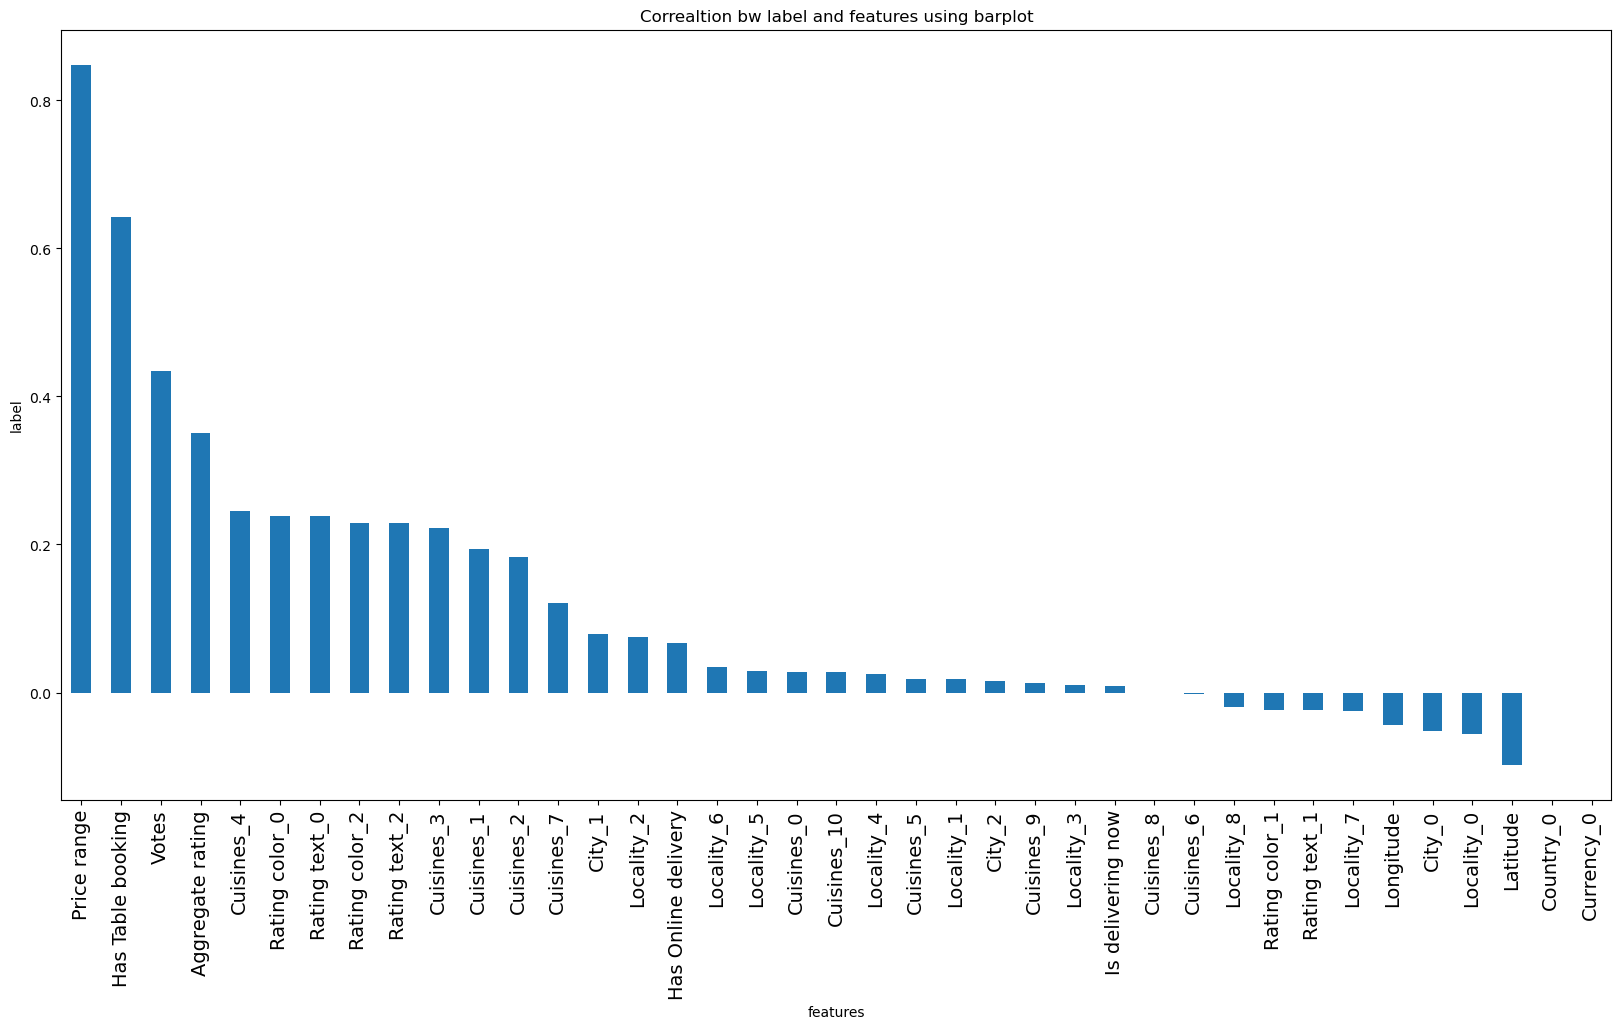

In [147]:
plt.figure(figsize=(20,10))
df.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.xticks(fontsize=14)
plt.title('Correaltion bw label and features using barplot')
plt.show()

# Observations-

1. Here we can see that Cuisines_6,Cuisines_8,Is delivering now,Locality_3,Cuisines_9,City_2,LOcality_1,Cuisine_5, has least correlationship with target variable.
2. Price range,Has table booking has the highest positive correlationship with target variable.

# Checking data statistics again after encoding of data-

In [437]:
df.describe()

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country_0,...,Cuisines_8,Cuisines_9,Cuisines_10,Currency_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2
count,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.0,...,7549.000000,7549.000000,7549.000000,7549.0,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000
mean,0.212822,0.080443,610.192078,0.136574,0.306796,0.004371,1.662869,-0.156575,-0.142245,1.0,...,0.397404,0.611472,0.551464,1.0,0.083587,0.457809,0.725129,0.083587,0.457809,0.725129
std,0.005704,0.014596,610.049498,0.343420,0.461194,0.065977,0.822720,0.931952,0.939104,0.0,...,0.489393,0.487448,0.497377,0.0,0.276786,0.498250,0.446479,0.276786,0.498250,0.446479
min,0.198786,0.015636,50.000000,0.000000,0.000000,0.000000,1.000000,-1.661470,-1.623553,1.0,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.207989,0.071833,300.000000,0.000000,0.000000,0.000000,1.000000,-0.543932,-0.847493,1.0,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.212956,0.080295,450.000000,0.000000,0.000000,0.000000,1.000000,0.158905,-0.103342,1.0,...,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.217375,0.091712,700.000000,0.000000,1.000000,0.000000,2.000000,0.513034,0.540557,1.0,...,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,0.231555,0.132225,8000.000000,1.000000,1.000000,1.000000,4.000000,1.945248,2.822242,1.0,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Observations-
​
1. Here we can see that all the columns has same count so there are no null values present in the dataset.
2. Mean is greater than median in columns like Averagecostfortwo,Votes,price range columns which means data is right skewed in these columns.
3. Median is greater than mean in columns like aggregate rating,votes columns which means data is left skewed in these columns.
4. The difference bw 75% and max values in columns like Average Cost for two,Votes,Aggregate rating column which means data having a lot of outliers in these columns.

# Separating features and label-

In [129]:
x=df.drop('Average Cost for two',axis=1)  
y=df['Average Cost for two']

# Feature Scaling using standard scaler-

In [130]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Longitude,Latitude,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,Country_0,City_0,City_1,...,Cuisines_7,Cuisines_9,Cuisines_10,Currency_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2
0,1.024442,-1.200217,-0.397715,-0.665264,-0.805758,0.158726,-0.751029,0.0,-2.168332,-0.411901,...,-0.758508,-1.254518,0.901862,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
1,1.005564,-1.198952,-0.397715,-0.665264,0.409803,0.071404,-0.116229,0.0,-2.168332,-0.411901,...,-0.758508,0.797119,-1.108817,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
2,1.013534,-1.199210,-0.397715,-0.665264,-0.805758,0.071404,-0.446824,0.0,-2.168332,-0.411901,...,-0.758508,0.797119,0.901862,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
3,1.018988,-1.199714,-0.397715,-0.665264,-0.805758,0.158726,-0.446824,0.0,-2.168332,-0.411901,...,-0.758508,0.797119,0.901862,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
4,1.015373,-1.200179,-0.397715,-0.665264,-0.805758,0.071404,-0.507884,0.0,-2.168332,-0.411901,...,-0.758508,-1.254518,-1.108817,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,1.641115,-0.325268,-0.397715,1.503163,0.409803,-0.098021,0.260974,0.0,0.461184,-0.411901,...,-0.758508,0.797119,-1.108817,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
7545,1.638870,-0.320176,-0.397715,-0.665264,-0.805758,-1.614885,-1.222705,0.0,0.461184,-0.411901,...,-0.758508,0.797119,-1.108817,0.0,-0.302012,1.088263,-1.624214,-0.302012,1.088263,-1.624214
7546,1.637708,-0.321310,-0.397715,-0.665264,0.409803,-1.614885,-0.866181,0.0,0.461184,-0.411901,...,-0.758508,0.797119,-1.108817,0.0,-0.302012,1.088263,-1.624214,-0.302012,1.088263,-1.624214
7547,1.639061,-0.320170,-0.397715,-0.665264,0.409803,-1.614885,-1.577467,0.0,0.461184,-0.411901,...,-0.758508,0.797119,-1.108817,0.0,-0.302012,1.088263,-1.624214,-0.302012,1.088263,-1.624214


Now the data has been scaled.

# Checking Multicollinearity among features-

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,2.552913,Longitude
1,2.477585,Latitude
2,1.820759,Has Table booking
3,1.246466,Has Online delivery
4,2.247457,Price range
5,18.233820,Aggregate rating
6,4.550559,Votes
7,NaN,Country_0
8,7.980265,City_0
9,6.849992,City_1


Here we can see that multicollinearity is high in Agrregate rating so we need to drop this column to bring VIF score in acceptable range i.e. <10.

In [132]:
x=x.drop(columns=['Aggregate rating'],axis=1)

In [133]:
#Checking multicollinearity again-

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,2.551694,Longitude
1,2.477564,Latitude
2,1.816647,Has Table booking
3,1.245170,Has Online delivery
4,2.247376,Price range
5,4.029801,Votes
6,NaN,Country_0
7,7.980217,City_0
8,6.849711,City_1
9,3.424013,City_2


Mow we can see that Multicollinearity is under acceptable range.

# Type of problem-

In [135]:
df['Average Cost for two'].value_counts()

300     801
500     770
400     749
200     624
600     569
       ... 
6500      1
4800      1
3650      1
1450      1
2350      1
Name: Average Cost for two, Length: 75, dtype: int64

So it is very much clear now from above result that it is a regression problem.

# Model-I (With all features without feature engineering)

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score

In [137]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.7998739162224555 at random state 193


Getting best accuracy at random state-91

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

# Linear regression-

In [139]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.7998739162224555
r2_score on train data - 0.7312126495003839
mean absolute error-  166.7190100837294
mean squared error-  53738.97452735659
root mean squared error-  231.8166830220737


For linear regression model train accuracy is 81% and test accuracy is 86%.

In [140]:
#Cross validation score-

In [141]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predlr)-score.mean())*100)

[-2.77832963e+23  7.40884500e-01  7.46232294e-01  7.37757133e-01
 -2.61529969e+24]
-5.7862653106092123e+23
difference bw r2_score and cross validation score is - 5.786265310609212e+25


The cross validation score for linear regression is 82%.

# Random forest-

In [142]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.8955513171910641
r2_score on train data - 0.9800777088327023
mean absolute error-  109.32260485651214
mean squared error-  28047.14407505519
root mean squared error-  167.47281592860134


For random forest the train accuracy is 90% and test accuracy is 98% so Generalised model can be seen.

In [143]:
#Cross validation score-

In [144]:
score1=cross_val_score(rf,x,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predrf)-score1.mean())*100)

[0.86092282 0.79830928 0.83697865 0.79922801 0.8038922 ]
0.819866191484761
difference bw r2_score and cross validation score is  7.568512570630304


The cross validation score for random forest regressor model is 80%

# KNN-

In [145]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.73545438165941
r2_score on train data - 0.7958653914570244
mean absolute error-  173.08167770419425
mean squared error-  71037.26799116998
root mean squared error-  266.52817485431063


For KNN model the train accuracy is 76% and test accuracy is 67%.underfitting of the model can be seen here.

In [146]:
#Cross validation score-

In [147]:
score2=cross_val_score(kn,x,y)
print(score2)
print(score2.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predkn)-score2.mean())*100)

[0.68452352 0.64215943 0.66360949 0.36457273 0.58220238]
0.5874135094417229
difference bw r2_score and cross validation score is - 14.804087221768714


The cross validation score for KNN model is 66%

# Gradientboostingregressor-

In [148]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.8912993666452703
r2_score on train data - 0.9063057236892829
mean absolute error-  112.81089291724771
mean squared error-  29188.90159990628
root mean squared error-  170.847597583069


For GBR model the train accuracy is 84% and test accuracy is 86% looks like a generalised model.

In [149]:
#Cross validation score-

In [150]:
score3=cross_val_score(gb,x,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.84264622 0.80233297 0.83518652 0.84666529 0.77677345]
0.8207208868582494
difference bw r2_score and cross validation score is - 7.0578479787020925


The cross validation score for Gradient boosting regressor is -82%

# Regularization-

# Lasso-

In [151]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.8012084716731721
r2_score on train data - 0.7310450725416795
mean absolute error-  165.68181845142163
mean squared error-  53380.61223885489
root mean squared error-  231.04244683359568


For lasso model train accuracy-62% & test accuracy-70%

In [152]:
#Cross validation score-

In [153]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.80043112 0.74115834 0.74804428 0.7435716  0.65276376]
0.7371938196395652
difference bw r2_score and cross validation score is-  6.40146520336069


The cross validation score for lasso model is 62%

# Ridge-

In [154]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.7999183157535164
r2_score on train data - 0.7312126062181974
mean absolute error-  166.68150626906888
mean squared error-  53727.052117125655
root mean squared error-  231.79096642692022


For Ridge model the train accuracy is 81% and test accuracy is 86%.

In [155]:
#Cross validation score-

In [156]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.79291074 0.74085792 0.74620471 0.73796757 0.64698173]
0.7329845357335103
difference bw r2_score and cross validation score is - 6.693378002000605


The cross validation score for Ridge model is 62%

# Decision tree regressor-

In [157]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.8246865071227777
r2_score on train data - 1.0
mean absolute error-  136.6225165562914
mean squared error-  47076.15894039735
root mean squared error-  216.9704102876642


for decision tree model train accuracy is 100% & test accuracy is 80% which looks like an overfitted model.

In [158]:
#Cross validation score-

In [159]:
score6=cross_val_score(dt,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.79028675 0.64584232 0.72285243 0.76117953 0.69900321]
0.7238328462702903
difference bw r2_score and cross validation score is - 10.085366085248737


The cross validation score for Decision tree model is 66%

# Support vector regressor-

In [160]:
from sklearn.svm import SVR

In [161]:
svr=SVR()
svr.fit(x_train,y_train)
predsv=svr.predict(x_test)
pred_train=svr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predsv))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predsv))
print('mean squared error- ',mean_squared_error(y_test,predsv))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predsv)))

r2_score on test data - 0.14586004274325148
r2_score on train data - 0.08756663211336968
mean absolute error-  261.6928390688986
mean squared error-  229358.43513951887
root mean squared error-  478.9138076308918


for support vector regressor the train accuracy is 86% and test accuracy is 85% which is looking like a good model.

In [162]:
#Cross validation score-

In [163]:
score6=cross_val_score(svr,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predsv)-score6.mean())*100)

[0.02766198 0.06838393 0.21345843 0.17179454 0.07524805]
0.11130938529192827
difference bw r2_score and cross validation score is - 3.4550657451323215


The cross validation score for SVR model is 80%

# ExtraTreesRegressor-

In [164]:
from sklearn.ensemble import ExtraTreesRegressor

In [165]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.8566399902753106
r2_score on train data - 0.9999947605019386
mean absolute error-  114.97757174392936
mean squared error-  38495.83105518764
root mean squared error-  196.2035449608076


For extra tree regressor train accuracy is 99.9% and test accuracy is 85%. clear overfitting can be seen here.

In [166]:
#Cross validation score-

In [167]:
score8=cross_val_score(et,x,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.85493207 0.77877283 0.84468619 0.77334776 0.80127966]
0.8106037020845663
difference bw r2_score and cross validation score is - 4.603628819074423


The cross validation score for extra tree regressor is 81%

# Selection of the best model-

here from the above models performances i choose Grdient boosting regressor as my best model as it is giving training accuracy-86% and test accuracy-84% with cross validation score of 82% which is best among all models. giving best accuracy among all features.

# Hyper-Parameter-tunning-

In [168]:
from sklearn.model_selection import RandomizedSearchCV

In [169]:
param_grid={'loss':['squared_error', 'absolute_error'],'criterion' : ['friedman_mse', 'squared_error'],'random_state':[200,400,600,700],'max_depth':[5,7,9,11],
            'n_estimators':[200,400],'min_samples_leaf':[7,9]}

In [170]:
gs=RandomizedSearchCV(GradientBoostingRegressor(),param_grid,cv=5)

In [171]:
gs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'loss': ['squared_error',
                                                 'absolute_error'],
                                        'max_depth': [5, 7, 9, 11],
                                        'min_samples_leaf': [7, 9],
                                        'n_estimators': [200, 400],
                                        'random_state': [200, 400, 600, 700]})

In [1541]:
gs.best_params_

{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 9,
 'n_estimators': 200,
 'random_state': 200}

In [172]:
final_model=GradientBoostingRegressor(criterion='friedman_mse',max_depth=3,loss='squared_error',n_estimators=200,random_state=200,min_samples_leaf=9)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [173]:
r2_score(y_test,pred)

0.8891608565682596

The accuracy of the model is increased to 89% by hyperparameter tunning.

# Saving model-

In [174]:
import joblib
joblib.dump(final_model,'Avg Price prediction-1')

['Avg Price prediction-1']

In [175]:
model=joblib.load('Avg Price prediction-1')

In [176]:
prediction=model.predict(x_test)
prediction

array([335.77424593, 245.30033861, 353.54562082, ..., 306.23981491,
       624.03925999, 645.09264695])

In [177]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,335.774246,200
1,245.300339,400
2,353.545621,350
3,297.819178,300
4,658.351291,600
...,...,...
2260,1291.943030,1200
2261,324.546892,300
2262,306.239815,350
2263,624.039260,700


In [178]:
df.head(50)

,predicted,original
0,335.774246,200
1,245.300339,400
2,353.545621,350
3,297.819178,300
4,658.351291,600
5,1272.247521,1500
6,289.486516,200
7,1432.308517,1200
8,2477.827085,2200
9,607.490927,600


# Plotting the difference bw the prediction & actual values to understand the difference better-

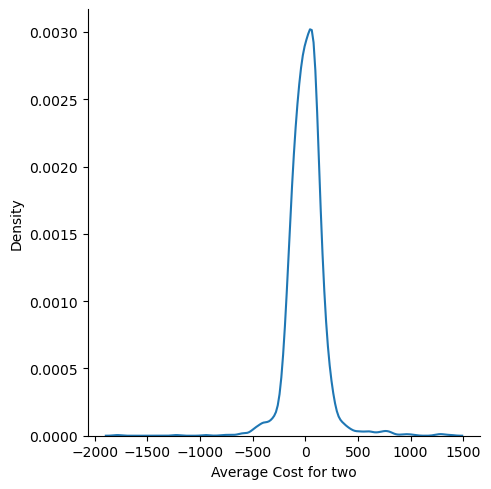

In [179]:
sns.displot(prediction-y_test,kind='kde')

Here we can see that the variance is bw predicted values & actual values is from -2000 to 1500.

# Model-II (Applying principle component analysis-)

In [277]:
df

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country_0,...,Cuisines_8,Cuisines_9,Cuisines_10,Currency_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2
241,0.218665,0.062926,250,0,0,0,1,-0.008660,-0.847493,1,...,0,0,1,1,0,0,1,0,0,1
242,0.218557,0.062945,500,0,0,0,2,-0.090035,-0.251389,1,...,0,1,0,1,0,0,1,0,0,1
243,0.218603,0.062941,150,0,0,0,1,-0.090035,-0.561831,1,...,0,1,1,1,0,0,1,0,0,1
244,0.218634,0.062934,150,0,0,0,1,-0.008660,-0.561831,1,...,0,1,1,1,0,0,1,0,0,1
245,0.218613,0.062927,100,0,0,0,1,-0.090035,-0.619170,1,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8484,0.222182,0.075696,700,0,1,0,2,-0.247920,0.102820,1,...,0,1,0,1,0,0,1,0,0,1
8485,0.222169,0.075770,400,0,0,0,1,-1.661470,-1.290417,1,...,0,1,0,1,0,1,0,0,1,0
8486,0.222163,0.075754,600,0,0,0,2,-1.661470,-0.955625,1,...,0,1,0,1,0,1,0,0,1,0
8487,0.222170,0.075770,500,0,0,0,2,-1.661470,-1.623553,1,...,0,1,0,1,0,1,0,0,1,0


Imported the data frame from the above after replacing nan values and removal of skewness and otliers & encoding of object data.

# Separating features and label-

In [278]:
x=df.drop(columns=['Average Cost for two'],axis=1)
y=df['Average Cost for two']

# Correlationship bw features & label-

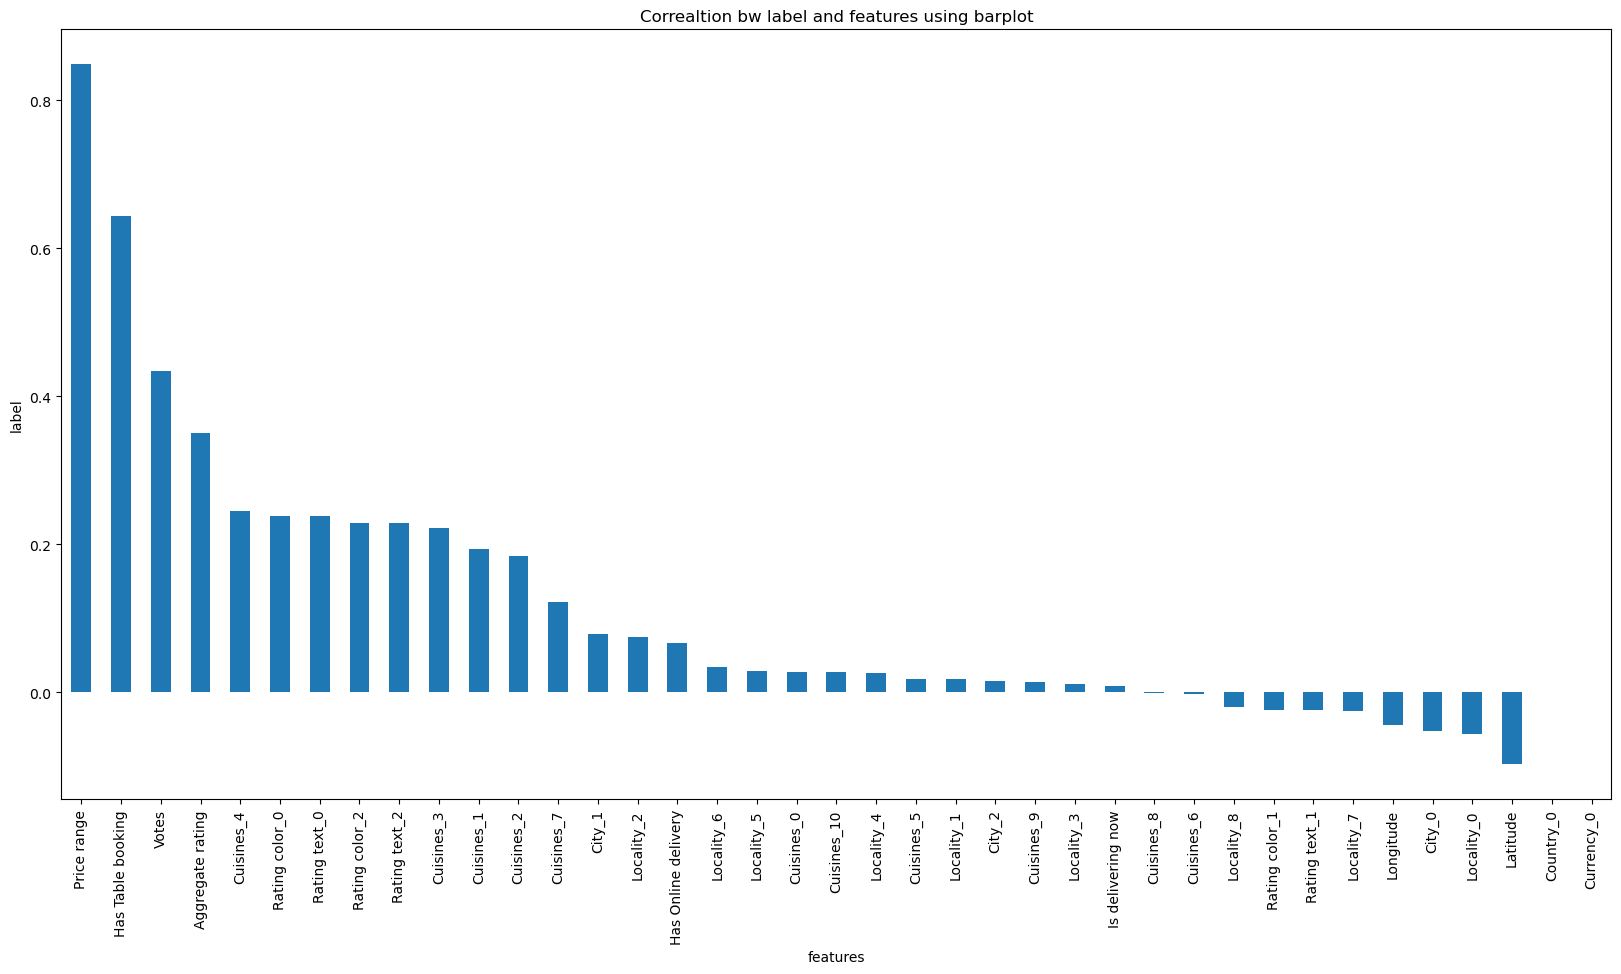

In [279]:
plt.figure(figsize=(20,10))
df.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

# Observations-

1. Here we can see that Cuisines_6,Cuisines_8,Is delivering now,Locality_3,Cuisines_9,City_2,LOcality_1,Cuisine_5, has least correlationship with target variable.
2. Price range,Has table booking has the highest positive correlationship with target variable.

# Feature scaling-

In [280]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country_0,City_0,...,Cuisines_8,Cuisines_9,Cuisines_10,Currency_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2
0,1.024442,-1.200217,-0.397715,-0.665264,-0.066262,-0.805758,0.158726,-0.751029,0.0,-2.168332,...,-0.812087,-1.254518,0.901862,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
1,1.005564,-1.198952,-0.397715,-0.665264,-0.066262,0.409803,0.071404,-0.116229,0.0,-2.168332,...,-0.812087,0.797119,-1.108817,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
2,1.013534,-1.199210,-0.397715,-0.665264,-0.066262,-0.805758,0.071404,-0.446824,0.0,-2.168332,...,-0.812087,0.797119,0.901862,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
3,1.018988,-1.199714,-0.397715,-0.665264,-0.066262,-0.805758,0.158726,-0.446824,0.0,-2.168332,...,-0.812087,0.797119,0.901862,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
4,1.015373,-1.200179,-0.397715,-0.665264,-0.066262,-0.805758,0.071404,-0.507884,0.0,-2.168332,...,1.231395,-1.254518,-1.108817,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,1.641115,-0.325268,-0.397715,1.503163,-0.066262,0.409803,-0.098021,0.260974,0.0,0.461184,...,-0.812087,0.797119,-1.108817,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
7545,1.638870,-0.320176,-0.397715,-0.665264,-0.066262,-0.805758,-1.614885,-1.222705,0.0,0.461184,...,-0.812087,0.797119,-1.108817,0.0,-0.302012,1.088263,-1.624214,-0.302012,1.088263,-1.624214
7546,1.637708,-0.321310,-0.397715,-0.665264,-0.066262,0.409803,-1.614885,-0.866181,0.0,0.461184,...,-0.812087,0.797119,-1.108817,0.0,-0.302012,1.088263,-1.624214,-0.302012,1.088263,-1.624214
7547,1.639061,-0.320170,-0.397715,-0.665264,-0.066262,0.409803,-1.614885,-1.577467,0.0,0.461184,...,-0.812087,0.797119,-1.108817,0.0,-0.302012,1.088263,-1.624214,-0.302012,1.088263,-1.624214


# Applying Principle component analysis-

In [281]:
from sklearn.decomposition import PCA

In [282]:
pca=PCA()
pca.fit_transform(x)

array([[ 1.78569459e-01,  1.97183057e+00, -2.32432153e+00, ...,
        -3.42000302e-16, -1.85759884e-16, -4.13068170e-16],
       [ 7.15040302e-01,  1.97639990e+00, -2.22036137e+00, ...,
         2.00084202e-16, -1.06764920e-16, -2.33845080e-16],
       [ 2.48884195e-01,  1.97268776e+00, -2.59976288e+00, ...,
         9.81113572e-16,  7.03273468e-17,  2.16503569e-16],
       ...,
       [-3.24460885e+00,  2.18487713e-01,  4.05266996e-01, ...,
        -6.17545490e-17, -1.90817557e-17, -1.74269133e-17],
       [-3.54337300e+00,  2.92444913e-01,  1.57788025e-01, ...,
        -9.29208557e-17, -1.62756267e-17, -3.12279361e-17],
       [-3.43333141e+00,  2.52113339e-01,  7.47006149e-01, ...,
         6.08453202e-17,  2.61304204e-17,  5.78635674e-17]])

In [283]:
#Lets check how much components required for model building which covers maximun variance-

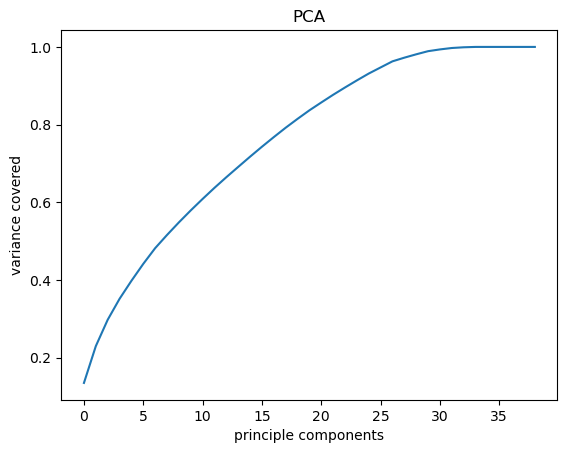

In [284]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))  #cumulative sum  #this explained ratio will tell the correlation bw feature 
plt.xlabel('principle components') #and label for every component of feature i.e igon values or the distance.
plt.ylabel('variance covered')   
plt.title('PCA')
plt.show()

From this figure we can say that 65 Components will be enough which will cover maximum variance so lets build 65 component from the existing features.

In [285]:
pca=PCA(n_components=32)
new_components=pca.fit_transform(x)

In [286]:
princi_comp=pd.DataFrame(new_components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,0.178569,1.971831,-2.324322,0.521375,-0.565096,0.429122,1.535710,0.122116,-0.733408,-0.362774,...,0.339664,-0.329044,-0.539711,0.930847,1.485282,1.173359,-1.030456,0.261452,-0.374568,-0.437344
1,0.715040,1.976400,-2.220361,0.664810,0.569858,-0.441873,1.682158,0.032223,-0.393688,-1.434398,...,0.773550,-0.668802,-0.230583,0.491061,0.043856,1.187607,-0.526768,1.011562,-0.075116,-0.478049
2,0.248884,1.972688,-2.599763,0.809618,0.142240,-0.412604,1.498602,0.084424,-0.655213,-0.720627,...,0.152203,-0.642569,-0.143451,0.413163,0.198269,1.145708,-1.098311,0.186653,-0.132164,-0.471367
3,0.283797,1.965536,-2.604431,0.803688,0.146713,-0.408485,1.498460,0.091358,-0.645450,-0.714927,...,0.147921,-0.661764,-0.137647,0.426642,0.199577,1.145866,-1.102322,0.181424,-0.153508,-0.467976
4,0.292255,1.946484,-2.015095,0.137793,-1.015316,1.277891,1.619925,0.069772,-0.479255,-0.964654,...,0.613990,-0.307433,-0.704088,0.524044,0.429710,1.147556,-0.981192,0.283412,-0.151637,-0.461693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,0.884129,-0.573735,-2.058326,0.750507,1.593998,-0.102399,0.567921,1.697691,-0.629137,-1.417335,...,1.069308,1.251517,-0.330333,1.074156,-0.617900,-1.128788,0.472343,0.359477,0.066218,-0.086259
7545,-3.669807,0.209437,0.053561,0.786274,1.305659,0.471658,0.110029,1.667312,-0.918703,-1.446554,...,0.268472,-0.060699,0.075124,1.241085,-0.725106,-1.229536,0.093620,-0.199687,0.165044,-0.058837
7546,-3.244609,0.218488,0.405267,0.736077,1.687225,0.276777,0.171521,1.616009,-0.858000,-1.144833,...,0.285846,0.060245,-0.019017,1.245828,-0.782039,-1.173045,0.587957,0.578819,0.261808,-0.075984
7547,-3.543373,0.292445,0.157788,0.928146,1.938000,-0.329068,0.273302,1.480484,-1.225429,-1.143384,...,0.721863,0.310568,-0.151293,1.286519,-0.562222,-1.194697,0.605855,0.487967,-0.327351,-0.019077


Here we have made 32 components from existing features now move further for model building.

# Model building-

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score

In [288]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=i) #x&ywe are giving we got after resampling
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.7996277459656643 at random state 193


In [289]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=maxrs)

# Linear regression-

In [290]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))   
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.7996277459656643
r2_score on train data - 0.7314482924838508
mean absolute error-  166.69456862957375
mean squared error-  53805.077540563994
root mean squared error-  231.95921525251802


for linear regression training accuracy is 73% and test accuracy is 80%  which looks like an underfitted model.

In [291]:
#Cross validation score-

In [292]:
score=cross_val_score(lr,princi_comp,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predlr)-score.mean())*100)

[-3.90336106e+03  7.41073321e-01  7.46413522e-01  7.31284607e-01
 -4.35645463e-01]
-780.3155861797737
difference bw r2_score and cross validation score is - 78111.52139257394


The cross validation score -22% for linear regression

# Random forest-

In [293]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.8208502280110734
r2_score on train data - 0.9665176674724504
mean absolute error-  132.01766004415012
mean squared error-  48106.29804856512
root mean squared error-  219.3314798394547


for random forest regressor the train accuracy is 97% and test accuracy is 82% so overfitting of the model can be seen here.

In [294]:
#Cross validation score-

In [295]:
score1=cross_val_score(rf,princi_comp,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predrf)-score1.mean())*100)

[0.75534965 0.74939372 0.7717351  0.72219994 0.6278539 ]
0.7253064630725945
difference bw r2_score and cross validation score is - 9.554376493847894


Random forest regressor cross validation score is 72%

# KNN-

In [296]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.7344769765670677
r2_score on train data - 0.7818645466403642
mean absolute error-  172.66754966887416
mean squared error-  71299.72626931567
root mean squared error-  267.0200858911473


For KNN model train accuracy is 78% and test accuracy is 73% an underfitted model can be seen.

In [297]:
#Cross validation score-

In [298]:
score2=cross_val_score(kn,princi_comp,y)
print(score2)
print(score2.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predkn)-score2.mean())*100)

[0.6360537  0.60807399 0.64993171 0.38356915 0.58656184]
0.5728380780800003
difference bw r2_score and cross validation score is - 16.163889848706738


Cross validation score for KNN is 57%

# GradientBoostingRegressor-

In [299]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.8040030542673097
r2_score on train data - 0.9121098964330445
mean absolute error-  142.05107108496486
mean squared error-  52630.195301661006
root mean squared error-  229.41271826483597


For gradient boosting regressor train accuracy is 91% and test accuracy is 81%

In [300]:
#Cross validation score-

In [301]:
score3=cross_val_score(gb,princi_comp,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.75581188 0.76368272 0.78319713 0.68204437 0.50932443]
0.698812104889034
difference bw r2_score and cross validation score is - 10.519094937827568


Cross validation score for Grdient boosting regressor is 70%.

# Lasso-

In [302]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.8014799724952325
r2_score on train data - 0.73133053616779
mean absolute error-  164.9505595413712
mean squared error-  53307.70732068801
root mean squared error-  230.88461906477878


For lasso model train accuracy is 73% and test accuracy is 80%

In [303]:
#Cross validation score-

In [304]:
score4=cross_val_score(lasso,princi_comp,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.80272952 0.74062934 0.74875611 0.73448659 0.50791763]
0.7069038388936485
difference bw r2_score and cross validation score is-  9.457613360158401


Cross validation score for Lasso model is 71%

# Ridge-

In [305]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.7996716097257514
r2_score on train data - 0.7314482548566523
mean absolute error-  166.65665648086198
mean squared error-  53793.29899854939
root mean squared error-  231.93382461070527


For ridge model train accuracy is 73% and test accuracy is 80%

In [306]:
#Cross validation score-

In [307]:
score5=cross_val_score(rd,princi_comp,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.80196868 0.74105809 0.74645665 0.73133113 0.63825821]
0.7318145508539834
difference bw r2_score and cross validation score is - 6.785705887176796


for ridge model cross validation score is 73%

# DecisionTreeRegressor-

In [308]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.2970566461654317
r2_score on train data - 1.0
mean absolute error-  204.3046357615894
mean squared error-  188758.27814569537
root mean squared error-  434.4632068952391


for decision tree training accuracy is 100% and test accuracy is 29% an overfitted model can be seen.

In [309]:
#Cross validation score-

In [310]:
score6=cross_val_score(dt,princi_comp,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.26191883 0.53681991 0.37604187 0.2874122  0.4365757 ]
0.37975370349610715
difference bw r2_score and cross validation score is - -8.269705733067545


for decision tree cross validation score is 38%.

# SVR

In [311]:
from sklearn.svm import SVR

In [312]:
svr=SVR()
svr.fit(x_train,y_train)
predsv=svr.predict(x_test)
pred_train=svr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predsv))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predsv))
print('mean squared error- ',mean_squared_error(y_test,predsv))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predsv)))

r2_score on test data - 0.13457100040704972
r2_score on train data - 0.07986494126832067
mean absolute error-  264.3400531335514
mean squared error-  232389.83188247288
root mean squared error-  482.06828549747274


for svr model train accuracy is 7% and test accuracy is 13%.

In [313]:
#Cross validation score-

In [314]:
score7=cross_val_score(svr,princi_comp,y)
print(score7)
print(score7.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predsv)-score7.mean())*100)

[0.02055226 0.05797562 0.20291427 0.1611693  0.06905448]
0.10233318468460413
difference bw r2_score and cross validation score is - 3.223781572244559


for svr model cross validation score is 10%

# Extra tree regressor-

In [315]:
from sklearn.ensemble import ExtraTreesRegressor

In [316]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.8706899025240835
r2_score on train data - 0.9999987467502683
mean absolute error-  121.93271523178807
mean squared error-  34723.07009271523
root mean squared error-  186.34127318636425


for extra tree regressor train accuracy is 99% and test accuracy is 87% so overfitting of the model can be seen here.

In [317]:
#Cross validation score-

In [318]:
score8=cross_val_score(et,princi_comp,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.80830422 0.75162538 0.82818414 0.7292588  0.62946225]
0.7493669592322976
difference bw r2_score and cross validation score is - 12.132294329178595


The cross validation score for extra tree regressor is 74%

# Selection of best model-

Here from the above performance of all the models we can see that Gradient boosting regressor is performing very well on this data set which is giving us train accuracy-91% test accuracy-81% with cross val score of 70% which is best among all models.

# Hyperparameter Tunning-

In [324]:
from sklearn.model_selection import RandomizedSearchCV

In [325]:
param_grid={'loss':['squared_error', 'absolute_error'],'criterion' : ['friedman_mse', 'squared_error'],'random_state':[200,400,600],'max_depth':[7,9,11],
            'n_estimators':[200,400],'min_samples_leaf':[7,9]}

In [326]:
gs=RandomizedSearchCV(GradientBoostingRegressor(),param_grid,cv=5)

In [327]:
gs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'loss': ['squared_error',
                                                 'absolute_error'],
                                        'max_depth': [7, 9, 11],
                                        'min_samples_leaf': [7, 9],
                                        'n_estimators': [200, 400],
                                        'random_state': [200, 400, 600]})

In [328]:
gs.best_params_

{'random_state': 600,
 'n_estimators': 400,
 'min_samples_leaf': 7,
 'max_depth': 7,
 'loss': 'squared_error',
 'criterion': 'friedman_mse'}

In [331]:
final_model=GradientBoostingRegressor(criterion='friedman_mse',max_depth=7,loss='squared_error',n_estimators=400,random_state=600,min_samples_leaf=7)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [332]:
r2_score(y_test,pred)

0.8259422292907947

The accuracy of lasso model is increased to 83% after hyperparameter tunning.

# Saving the model-

In [335]:
import joblib
joblib.dump(final_model,'Rainfall prediction-2')

['Rainfall prediction-2']

In [336]:
model=joblib.load('Rainfall prediction-2')

In [337]:
#prediction-

In [338]:
prediction=model.predict(x_test)
prediction

array([327.87634288, 281.62280967, 454.99443874, ..., 281.05658837,
       383.24021361, 565.81828283])

In [339]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,327.876343,200
1,281.622810,400
2,454.994439,350
3,283.142653,300
4,660.768026,600
...,...,...
2260,812.687392,1200
2261,341.031769,300
2262,281.056588,350
2263,383.240214,700


# Plotting the difference bw the prediction & actual values to understand the difference better-

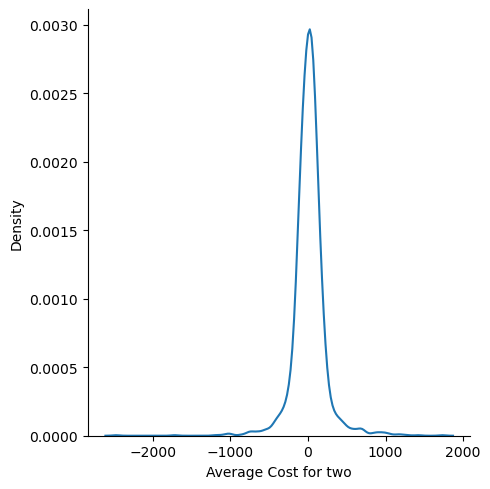

In [340]:
sns.displot(prediction-y_test,kind='kde')

Here we can see that the variance is bw predicted values & actual values is from almost -2500 to 2000.

# Conclusion-

Here we have made 2 model-

1. Model-I with Gradient boosting regressor with 89% accuracy.
2. Model-Ii with Gradient boosting regressor with 83% accuracy.

# Part-II (Predicting Price range )

In [438]:
df

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country_0,...,Cuisines_8,Cuisines_9,Cuisines_10,Currency_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2
241,0.218665,0.062926,250,0,0,0,1,-0.008660,-0.847493,1,...,0,0,1,1,0,0,1,0,0,1
242,0.218557,0.062945,500,0,0,0,2,-0.090035,-0.251389,1,...,0,1,0,1,0,0,1,0,0,1
243,0.218603,0.062941,150,0,0,0,1,-0.090035,-0.561831,1,...,0,1,1,1,0,0,1,0,0,1
244,0.218634,0.062934,150,0,0,0,1,-0.008660,-0.561831,1,...,0,1,1,1,0,0,1,0,0,1
245,0.218613,0.062927,100,0,0,0,1,-0.090035,-0.619170,1,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8484,0.222182,0.075696,700,0,1,0,2,-0.247920,0.102820,1,...,0,1,0,1,0,0,1,0,0,1
8485,0.222169,0.075770,400,0,0,0,1,-1.661470,-1.290417,1,...,0,1,0,1,0,1,0,0,1,0
8486,0.222163,0.075754,600,0,0,0,2,-1.661470,-0.955625,1,...,0,1,0,1,0,1,0,0,1,0
8487,0.222170,0.075770,500,0,0,0,2,-1.661470,-1.623553,1,...,0,1,0,1,0,1,0,0,1,0


Imported the data frame from above after filling nan values.

# Exploratory data analysis-

In [439]:
df.nunique()

Longitude               6627
Latitude                7185
Average Cost for two      75
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Price range                4
Aggregate rating          33
Votes                    738
Country_0                  1
City_0                     2
City_1                     2
City_2                     2
Locality_0                 2
Locality_1                 2
Locality_2                 2
Locality_3                 2
Locality_4                 2
Locality_5                 2
Locality_6                 2
Locality_7                 2
Locality_8                 2
Cuisines_0                 2
Cuisines_1                 2
Cuisines_2                 2
Cuisines_3                 2
Cuisines_4                 2
Cuisines_5                 2
Cuisines_6                 2
Cuisines_7                 2
Cuisines_8                 2
Cuisines_9                 2
Cuisines_10                2
Currency_0                 1
Rating color_0

<AxesSubplot:xlabel='Price range', ylabel='Average Cost for two'>

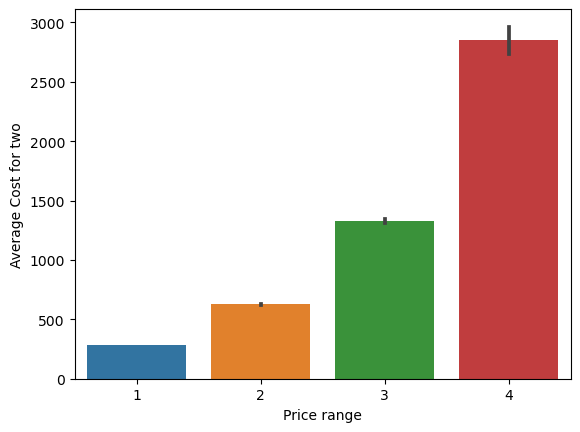

In [440]:
sns.barplot(x='Price range',y='Average Cost for two',data=df)

For price range 3 the average cost for two is highest.

<AxesSubplot:xlabel='Price range', ylabel='Votes'>

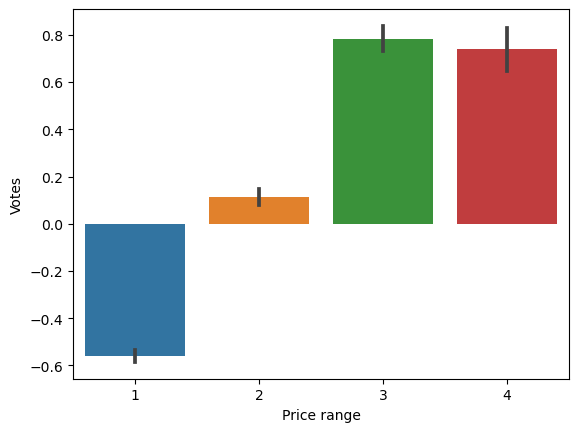

In [441]:
sns.barplot(x='Price range',y='Votes',data=df)

For price range 3 no of ratings casted by the people are highest.

<AxesSubplot:xlabel='Price range', ylabel='Longitude'>

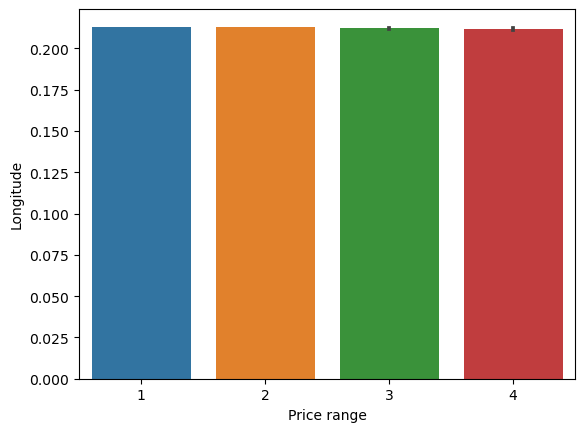

In [442]:
sns.barplot(x='Price range',y='Longitude',data=df)

as the price range in increasing from 1 to 4 longitude decreasing.

<AxesSubplot:xlabel='Price range', ylabel='Latitude'>

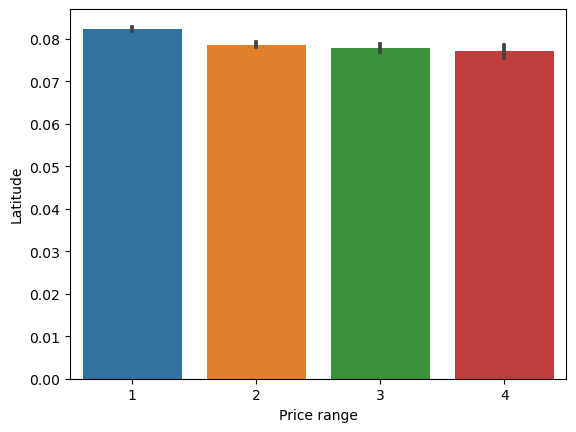

In [443]:
sns.barplot(x='Price range',y='Latitude',data=df)

Similarly as the price range in increasing from 1 to 4 latitude decreasing.

<AxesSubplot:xlabel='Price range', ylabel='Aggregate rating'>

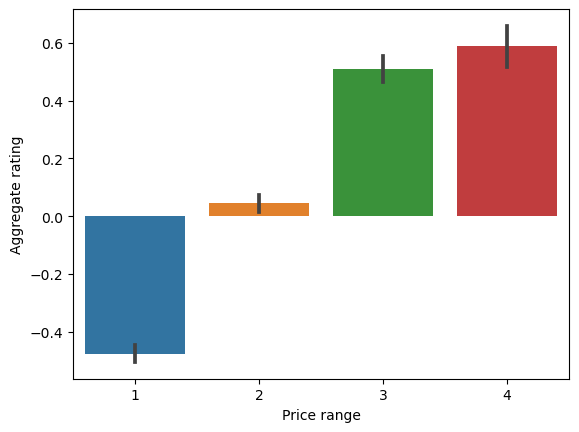

In [444]:
sns.barplot(x='Price range',y='Aggregate rating',data=df)

For price range 4 the aggregate ratings are highest.

In [445]:
#Importing the data frame from above after the removal of skewness & outliers and encoding of object data-

In [446]:
df

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country_0,...,Cuisines_8,Cuisines_9,Cuisines_10,Currency_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2
241,0.218665,0.062926,250,0,0,0,1,-0.008660,-0.847493,1,...,0,0,1,1,0,0,1,0,0,1
242,0.218557,0.062945,500,0,0,0,2,-0.090035,-0.251389,1,...,0,1,0,1,0,0,1,0,0,1
243,0.218603,0.062941,150,0,0,0,1,-0.090035,-0.561831,1,...,0,1,1,1,0,0,1,0,0,1
244,0.218634,0.062934,150,0,0,0,1,-0.008660,-0.561831,1,...,0,1,1,1,0,0,1,0,0,1
245,0.218613,0.062927,100,0,0,0,1,-0.090035,-0.619170,1,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8484,0.222182,0.075696,700,0,1,0,2,-0.247920,0.102820,1,...,0,1,0,1,0,0,1,0,0,1
8485,0.222169,0.075770,400,0,0,0,1,-1.661470,-1.290417,1,...,0,1,0,1,0,1,0,0,1,0
8486,0.222163,0.075754,600,0,0,0,2,-1.661470,-0.955625,1,...,0,1,0,1,0,1,0,0,1,0
8487,0.222170,0.075770,500,0,0,0,2,-1.661470,-1.623553,1,...,0,1,0,1,0,1,0,0,1,0


In [447]:
#Separating features and label-

In [448]:
x=df.drop('Price range',axis=1)  
y=df['Price range']

# Correlation bw features & label-

In [449]:
df.corr()['Price range'].sort_values()

Latitude               -0.129539
Locality_0             -0.085331
City_0                 -0.082295
Rating color_1         -0.053288
Rating text_1          -0.053288
Longitude              -0.047127
Cuisines_8             -0.024220
Locality_8             -0.020037
Locality_3             -0.019850
Locality_7             -0.018969
Cuisines_6             -0.006623
Cuisines_5             -0.000015
Cuisines_10             0.004039
Locality_5              0.024029
Is delivering now       0.024714
Locality_1              0.033834
Locality_6              0.033958
Cuisines_0              0.040841
Locality_4              0.041964
Locality_2              0.051333
City_2                  0.054797
Cuisines_9              0.061181
City_1                  0.108441
Cuisines_7              0.163691
Cuisines_2              0.179502
Has Online delivery     0.180098
Cuisines_1              0.182674
Cuisines_3              0.232475
Rating text_0           0.247106
Rating color_0          0.247106
Cuisines_4

# Graphical Representation of correlationship between features & target variable-

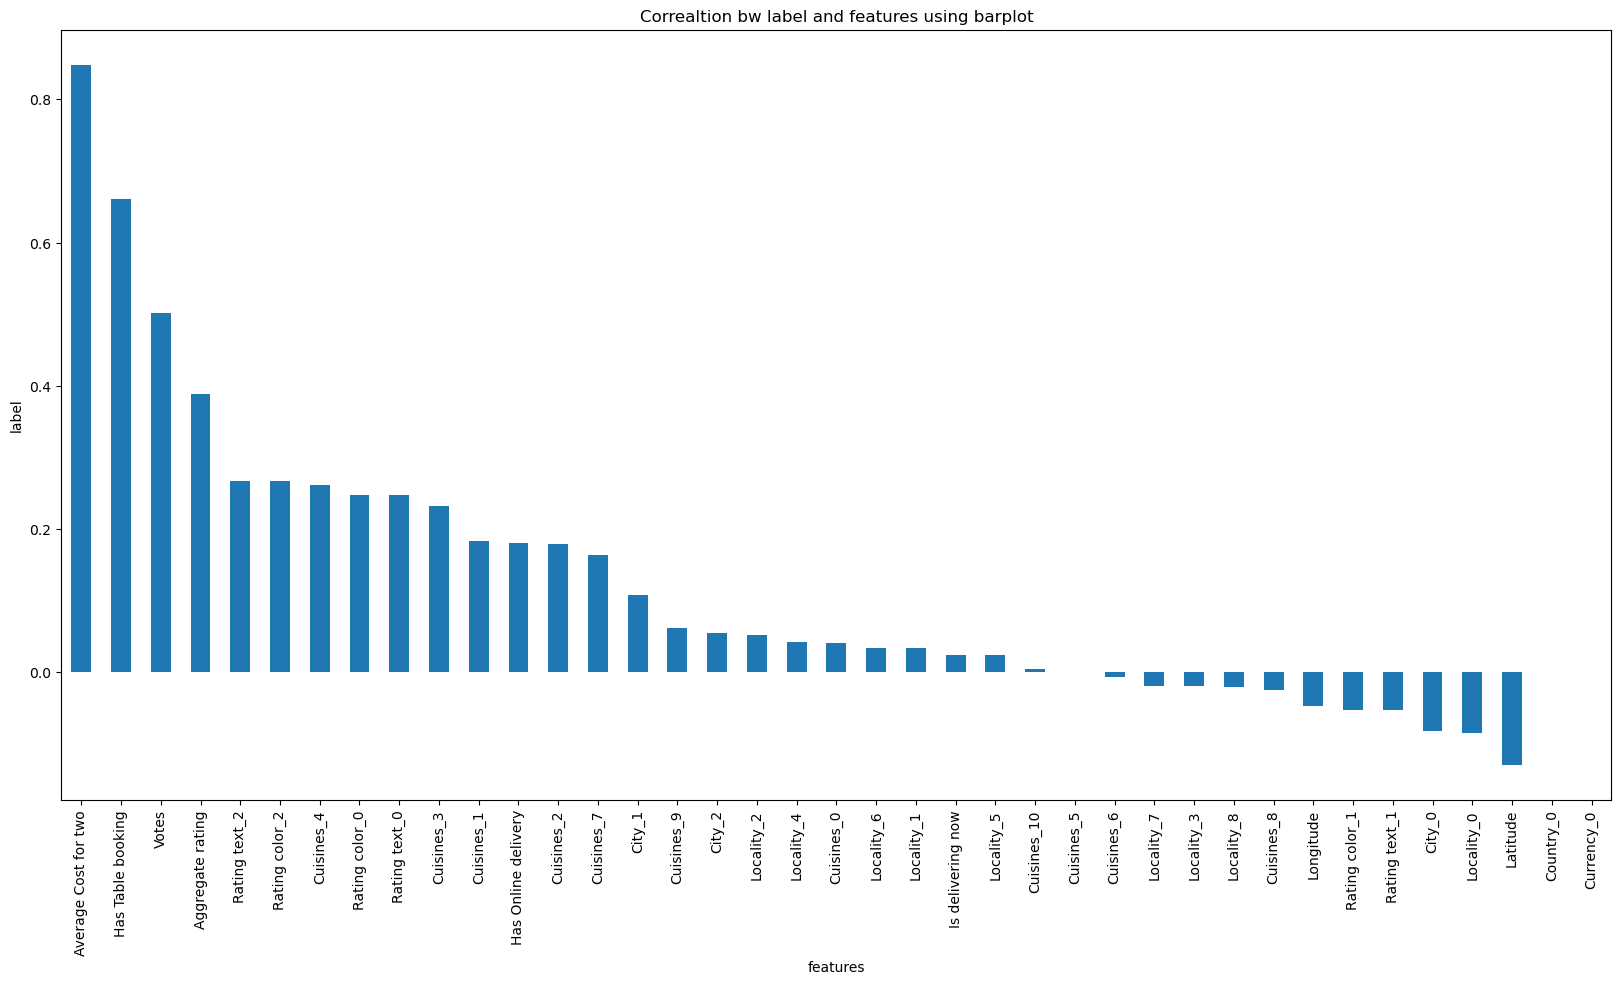

In [450]:
plt.figure(figsize=(20,10))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

# Observations-


1. Locality_5,Cuisine_10,Cuisine_6,Locality_7,Locality_3,Locality_8 has very least correlationship with target variable.
2. Average cost for two,Has table booking,Votes columns has the highest positive correlationship with target variable.
3. Latitude has negetive correlationship with target variable.

# Feature Scaling-

In [451]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Country_0,City_0,...,Cuisines_8,Cuisines_9,Cuisines_10,Currency_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2
0,1.024442,-1.200217,-0.590470,-0.397715,-0.665264,-0.066262,0.158726,-0.751029,0.0,-2.168332,...,-0.812087,-1.254518,0.901862,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
1,1.005564,-1.198952,-0.180640,-0.397715,-0.665264,-0.066262,0.071404,-0.116229,0.0,-2.168332,...,-0.812087,0.797119,-1.108817,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
2,1.013534,-1.199210,-0.754402,-0.397715,-0.665264,-0.066262,0.071404,-0.446824,0.0,-2.168332,...,-0.812087,0.797119,0.901862,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
3,1.018988,-1.199714,-0.754402,-0.397715,-0.665264,-0.066262,0.158726,-0.446824,0.0,-2.168332,...,-0.812087,0.797119,0.901862,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
4,1.015373,-1.200179,-0.836368,-0.397715,-0.665264,-0.066262,0.071404,-0.507884,0.0,-2.168332,...,1.231395,-1.254518,-1.108817,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,1.641115,-0.325268,0.147224,-0.397715,1.503163,-0.066262,-0.098021,0.260974,0.0,0.461184,...,-0.812087,0.797119,-1.108817,0.0,-0.302012,-0.918895,0.615682,-0.302012,-0.918895,0.615682
7545,1.638870,-0.320176,-0.344572,-0.397715,-0.665264,-0.066262,-1.614885,-1.222705,0.0,0.461184,...,-0.812087,0.797119,-1.108817,0.0,-0.302012,1.088263,-1.624214,-0.302012,1.088263,-1.624214
7546,1.637708,-0.321310,-0.016708,-0.397715,-0.665264,-0.066262,-1.614885,-0.866181,0.0,0.461184,...,-0.812087,0.797119,-1.108817,0.0,-0.302012,1.088263,-1.624214,-0.302012,1.088263,-1.624214
7547,1.639061,-0.320170,-0.180640,-0.397715,-0.665264,-0.066262,-1.614885,-1.577467,0.0,0.461184,...,-0.812087,0.797119,-1.108817,0.0,-0.302012,1.088263,-1.624214,-0.302012,1.088263,-1.624214


Now the data has been scaled.

# Checking Multicollinearity among features-

In [452]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,2.606800,Longitude
1,2.477335,Latitude
2,2.016116,Average Cost for two
3,1.762174,Has Table booking
4,1.276702,Has Online delivery
5,1.023962,Is delivering now
6,18.260103,Aggregate rating
7,4.448896,Votes
8,NaN,Country_0
9,9.785483,City_0


Here we can see that in Aggregate rating column has high VIF score than the acceptable range i.e. <10 so we will drop it moving further for model building.

In [453]:
x=x.drop(columns=['Aggregate rating'],axis=1)

In [454]:
#Checking multicollinearity again-

In [455]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,2.605497,Longitude
1,2.477293,Latitude
2,2.015329,Average Cost for two
3,1.756915,Has Table booking
4,1.275661,Has Online delivery
5,1.023939,Is delivering now
6,3.933646,Votes
7,NaN,Country_0
8,9.785263,City_0
9,7.007845,City_1


Now we can see tha multicollinearity among features are in acceptable range.

# Treating Class imbalance with Oversampling method-

In [456]:
y.value_counts()

1    3955
2    2485
3     808
4     301
Name: Price range, dtype: int64

Here we can see the data is not balanced, since it is a classification problem we will balance the data using oversampling method-

In [457]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [458]:
y.value_counts()

1    3955
2    3955
3    3955
4    3955
Name: Price range, dtype: int64

Now the data is balanced.now we can build machine learning classification models further-

# Model-I (With all features without feature engineering)

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)  

NameError: name 'LogisticRegression' is not defined

Here we can see that at random state 136 our model performing best and giving highest accuracy of almost 99% so we will use this random state for splitting of the data

In [460]:
# Splitting of data on the same random state-

In [461]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [462]:
#Importing library-

In [170]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [464]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('=====================Test Result=====================') 
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Confusion matrix\n', confusion_matrix(y_test,pred))
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

# Random forest-

In [465]:
rf=RandomForestClassifier() 

rf.fit(x_train,y_train)

RandomForestClassifier()

In [466]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) 
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:99.94%


 Confusion matrix
 [[1150    0    0    0]
 [   0 1197    2    0]
 [   0    1 1191    0]
 [   0    0    0 1205]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1150
           2       1.00      1.00      1.00      1199
           3       1.00      1.00      1.00      1192
           4       1.00      1.00      1.00      1205

    accuracy                           1.00      4746
   macro avg       1.00      1.00      1.00      4746
weighted avg       1.00      1.00      1.00      4746



for Random forest classifier we got train accuracy-100% & test accuracy-99% and F1 Score-100% which seems like an overfitted model as training & testing accuracy reaching 100%.

In [467]:
#Cross validation score-

In [468]:
score=cross_val_score(rf,x,y)
print(score)
print(score.mean())

[0.93457649 0.99968394 0.99968394 1.         0.99968394]
0.9867256637168141


The cross validation score for random forest model is 98%.

# Logistic regression-

In [469]:
lr=LogisticRegression() 
lr.fit(x_train,y_train)

LogisticRegression()

In [470]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True) 
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 99.37%
=====================Test Result=====================
accuracy_score:99.45%


 Confusion matrix
 [[1141    9    0    0]
 [   0 1185   14    0]
 [   0    0 1189    3]
 [   0    0    0 1205]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1150
           2       0.99      0.99      0.99      1199
           3       0.99      1.00      0.99      1192
           4       1.00      1.00      1.00      1205

    accuracy                           0.99      4746
   macro avg       0.99      0.99      0.99      4746
weighted avg       0.99      0.99      0.99      4746



from Logistic Regression we are getting training accuracy-99% & test accuracy-99% with F1 Score-100% 

In [471]:
#Cross validation score-

In [472]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())

[0.91782554 0.97597977 0.98609355 0.99020228 0.94785082]
0.963590391908976


The cross validation score for Logistic regression is 97%

# Support Vector Classifier-

In [473]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [474]:
metric_score(sv,x_train,x_test,y_train,y_test, train=True)
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 98.44%
=====================Test Result=====================
accuracy_score:96.90%


 Confusion matrix
 [[1069   80    1    0]
 [  36 1144   19    0]
 [   0    6 1181    5]
 [   0    0    0 1205]]


 Test classification report
               precision    recall  f1-score   support

           1       0.97      0.93      0.95      1150
           2       0.93      0.95      0.94      1199
           3       0.98      0.99      0.99      1192
           4       1.00      1.00      1.00      1205

    accuracy                           0.97      4746
   macro avg       0.97      0.97      0.97      4746
weighted avg       0.97      0.97      0.97      4746



for Support vector classifier we got train accuracy-98% & test accuracy-87% and F1 Score-97% which looks like a generalised model.

In [475]:
#Cross validation score-

In [476]:
score=cross_val_score(sv,x,y)
print(score)
print(score.mean())

[0.86852086 0.88969659 0.90360303 0.93742099 0.88969659]
0.8977876106194691


The cross validation score for support vector classifier is 91%.

# GradientBoostingClassifier-

In [477]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [478]:
metric_score(gb,x_train,x_test,y_train,y_test, train=True)
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:100.00%


 Confusion matrix
 [[1150    0    0    0]
 [   0 1199    0    0]
 [   0    0 1192    0]
 [   0    0    0 1205]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1150
           2       1.00      1.00      1.00      1199
           3       1.00      1.00      1.00      1192
           4       1.00      1.00      1.00      1205

    accuracy                           1.00      4746
   macro avg       1.00      1.00      1.00      4746
weighted avg       1.00      1.00      1.00      4746



for Gradient boosting classifier we got train accuracy-100% & test accuracy-100% and F1 Score-100% which seems like an ovetfitted model.

# AdaBoostClassifier-

In [479]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [480]:
metric_score(ab,x_train,x_test,y_train,y_test, train=True)
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 75.11%
=====================Test Result=====================
accuracy_score:74.74%


 Confusion matrix
 [[1150    0    0    0]
 [   0    0 1199    0]
 [   0    0 1192    0]
 [   0    0    0 1205]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1150
           2       0.00      0.00      0.00      1199
           3       0.50      1.00      0.67      1192
           4       1.00      1.00      1.00      1205

    accuracy                           0.75      4746
   macro avg       0.62      0.75      0.67      4746
weighted avg       0.62      0.75      0.66      4746



for Ada boost classifier we got train accuracy-75% & test accuracy-75% and F1 Score-75% which looks like an underfitted model.

In [481]:
#Cross validation score-

In [482]:
score=cross_val_score(ab,x,y)
print(score)
print(score.mean())

[0.75 0.75 0.75 0.75 0.75]
0.75


The cross validation score for Adaboost claasifier is 75%.

# BaggingClassifier-

In [483]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [484]:
metric_score(bc,x_train,x_test,y_train,y_test, train=True)
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:100.00%


 Confusion matrix
 [[1150    0    0    0]
 [   0 1199    0    0]
 [   0    0 1192    0]
 [   0    0    0 1205]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1150
           2       1.00      1.00      1.00      1199
           3       1.00      1.00      1.00      1192
           4       1.00      1.00      1.00      1205

    accuracy                           1.00      4746
   macro avg       1.00      1.00      1.00      4746
weighted avg       1.00      1.00      1.00      4746



For Bagging classifier we got train accuracy-100% & test accuracy-100% and F1 Score-100% which looks like overfitted model as train & test accuracy is reaching 100%.

In [485]:
#Cross validation score-

In [486]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())

[1. 1. 1. 1. 1.]
1.0


The cross validation score for bagging classifier is 100%

# ExtraTreeClassifier-

In [487]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [488]:
metric_score(et,x_train,x_test,y_train,y_test, train=True)
metric_score(et,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:97.13%


 Confusion matrix
 [[1106   42    2    0]
 [  60 1116   23    0]
 [   0    8 1183    1]
 [   0    0    0 1205]]


 Test classification report
               precision    recall  f1-score   support

           1       0.95      0.96      0.96      1150
           2       0.96      0.93      0.94      1199
           3       0.98      0.99      0.99      1192
           4       1.00      1.00      1.00      1205

    accuracy                           0.97      4746
   macro avg       0.97      0.97      0.97      4746
weighted avg       0.97      0.97      0.97      4746



for Extra tree classifier we got train accuracy-100% & test accuracy-96% and F1 Score-96% which looks like overfitted model as train accuracy is reaching about 100%

In [489]:
#Cross validation score-

In [490]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())

[0.79329962 0.8568268  0.91972187 0.93900126 0.84481669]
0.8707332490518331


The cross validation score for Extra tree classifier is 87%

# DecisionTreeclassifier-

In [491]:
from sklearn.tree import DecisionTreeClassifier

In [492]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [493]:
metric_score(dt,x_train,x_test,y_train,y_test, train=True)
metric_score(dt,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:100.00%


 Confusion matrix
 [[1150    0    0    0]
 [   0 1199    0    0]
 [   0    0 1192    0]
 [   0    0    0 1205]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1150
           2       1.00      1.00      1.00      1199
           3       1.00      1.00      1.00      1192
           4       1.00      1.00      1.00      1205

    accuracy                           1.00      4746
   macro avg       1.00      1.00      1.00      4746
weighted avg       1.00      1.00      1.00      4746



for Decision Tree classifier we got train accuracy-100% & test accuracy-100% and F1 Score-100% which seems like an overfitted model as train accuracy is 100%

In [494]:
#Cross validation score-

In [495]:
score=cross_val_score(dt,x,y)
print(score)
print(score.mean())

[1. 1. 1. 1. 1.]
1.0


The cross validation score for Decision tree classifier is 100%.

# Selection of best model-

here we can see that SVC model is performing well on this data set here which is giving us train accuracy-98% & test accuracy and F1 score-96% with cross validation score of 91% so as this is a class imbalance problem so differnce bw f1score and test accuracy comes into play which must be less as possible.
Other than SVC many models getting train accuracy 100% which means the model is overfitting so from estimating the performance of all models we select SVC as my best performing model.

# Hyper parameter tunning-

In [497]:
from sklearn.model_selection import RandomizedSearchCV

In [498]:
param_grid={'C':[15,20,25,30],'random_state': [10,20,200,300,400],'degree':[7,9],'kernel' : ['linear', 'poly'],'gamma' : ['scale', 'auto'],'max_iter':[-1,1]}

In [499]:
sv.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [500]:
gs=RandomizedSearchCV(SVC(),param_grid,cv=5)

In [501]:
gs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [15, 20, 25, 30], 'degree': [7, 9],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly'],
                                        'max_iter': [-1, 1],
                                        'random_state': [10, 20, 200, 300,
                                                         400]})

In [502]:
gs.best_params_

{'random_state': 200,
 'max_iter': -1,
 'kernel': 'linear',
 'gamma': 'scale',
 'degree': 9,
 'C': 20}

In [503]:
final_model=SVC(C=20,
 degree=9,
 gamma='scale',
 kernel= 'linear',
 max_iter= -1,
 random_state= 200)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [504]:
accuracy_score(y_test,pred)

0.9993678887484198

Here we can see that the accuracy of the Support vector classifier model has been increased to almost 100% with the help of grid search CV,where as it was just 96% earlier.

# Saving model-

In [505]:
import joblib
joblib.dump(final_model,'Rainfall forecasting-1')

['Rainfall forecasting-1']

In [506]:
model=joblib.load('Rainfall forecasting-1')

In [507]:
prediction=model.predict(x_test)
prediction

array([3, 3, 4, ..., 2, 3, 4], dtype=int64)

In [508]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,3,3
1,3,3
2,4,4
3,4,4
4,2,2
...,...,...
4741,2,2
4742,2,2
4743,2,2
4744,3,3


# Model-II (Feature selection with Select Kbest method-)

In [148]:
#Importing the data frame from above after the removal of skewness & outliers and encoding of object data-

In [149]:
df

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country_0,...,Cuisines_8,Cuisines_9,Cuisines_10,Currency_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2
241,0.218665,0.062926,250,0,0,0,1,-0.008660,-0.847493,1,...,0,0,1,1,0,0,1,0,0,1
242,0.218557,0.062945,500,0,0,0,2,-0.090035,-0.251389,1,...,0,1,0,1,0,0,1,0,0,1
243,0.218603,0.062941,150,0,0,0,1,-0.090035,-0.561831,1,...,0,1,1,1,0,0,1,0,0,1
244,0.218634,0.062934,150,0,0,0,1,-0.008660,-0.561831,1,...,0,1,1,1,0,0,1,0,0,1
245,0.218613,0.062927,100,0,0,0,1,-0.090035,-0.619170,1,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8484,0.222182,0.075696,700,0,1,0,2,-0.247920,0.102820,1,...,0,1,0,1,0,0,1,0,0,1
8485,0.222169,0.075770,400,0,0,0,1,-1.661470,-1.290417,1,...,0,1,0,1,0,1,0,0,1,0
8486,0.222163,0.075754,600,0,0,0,2,-1.661470,-0.955625,1,...,0,1,0,1,0,1,0,0,1,0
8487,0.222170,0.075770,500,0,0,0,2,-1.661470,-1.623553,1,...,0,1,0,1,0,1,0,0,1,0


# Correlationship bw features & label-

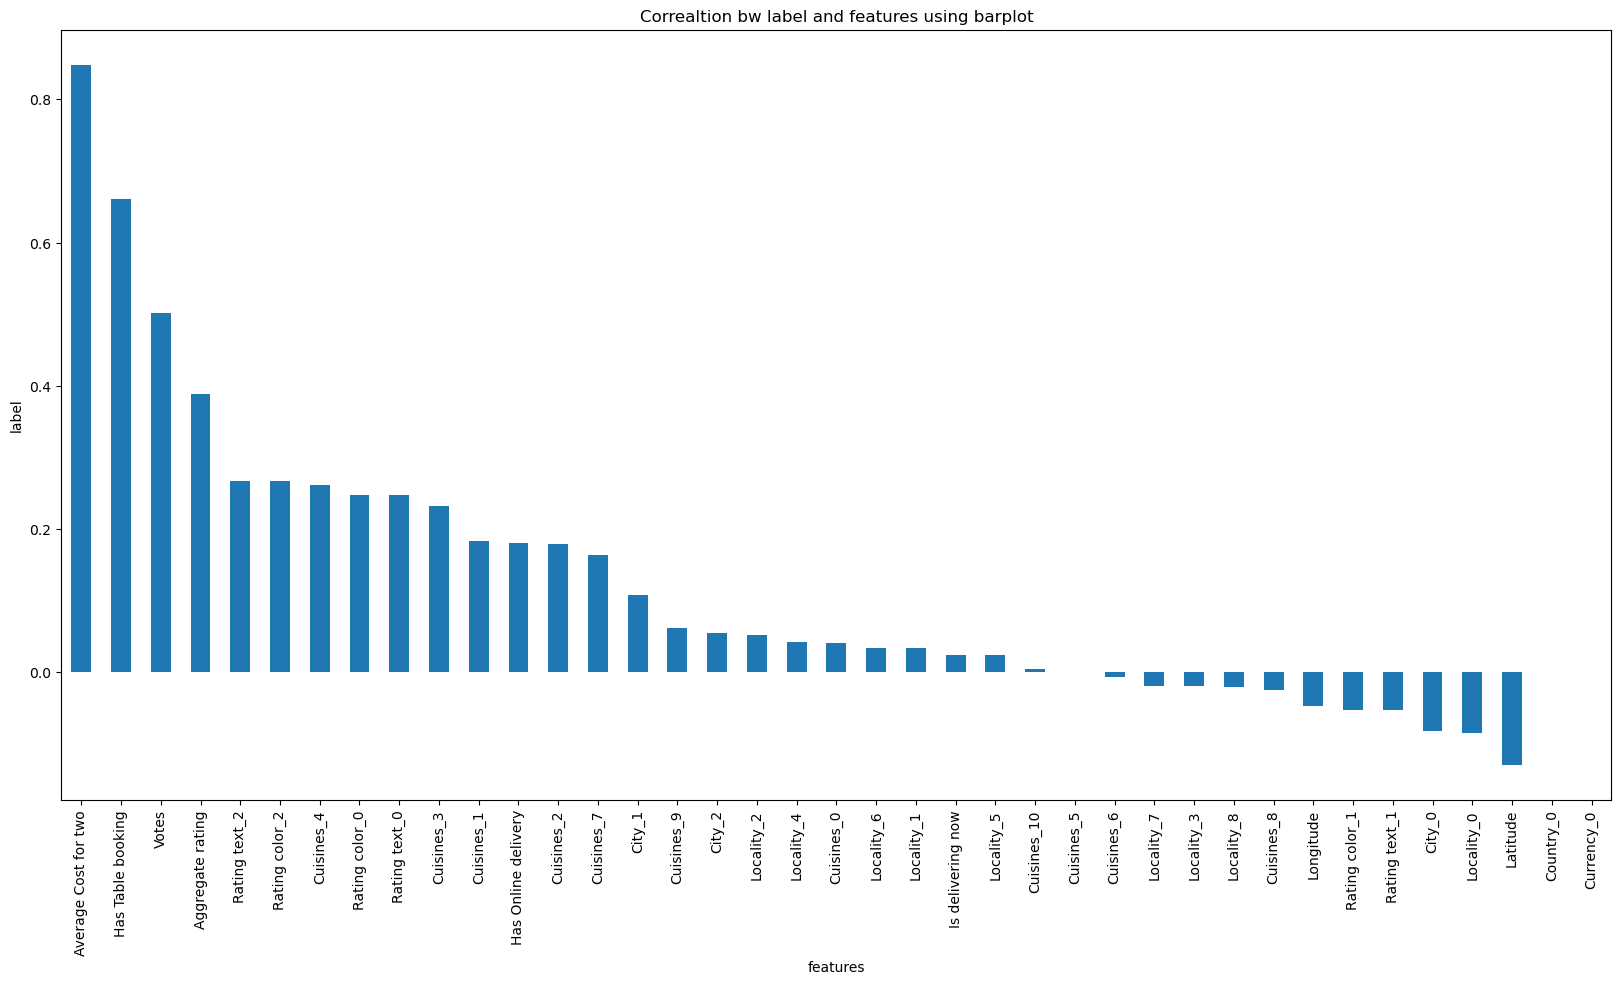

In [150]:
plt.figure(figsize=(20,10))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

# Observations-


1. Locality_5,Cuisine_10,Cuisine_6,Locality_7,Locality_3,Locality_8 has very least correlationship with target variable.
2. Average cost for two,Has table booking,Votes columns has the highest positive correlationship with target variable.
3. Latitude has negetive correlationship with target variable.

# Feature selection through select k-best method-

In [151]:
x=df.drop(columns=['Price range'],axis=1)
y=df['Price range']

In [152]:
from sklearn.feature_selection import SelectKBest,f_classif

In [153]:
best_features=SelectKBest(score_func=f_classif,k=30) 

fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)   
df_columns=pd.DataFrame(x.columns) 



feature_score= pd.concat([df_scores,df_columns],axis=1)
feature_score.columns=['score','feature_name']  

print(feature_score.nlargest(24,'score'))

           score          feature_name
2   12620.422877  Average Cost for two
3    2998.001206     Has Table booking
7     913.562673                 Votes
6     468.089921      Aggregate rating
4     317.700658   Has Online delivery
35    221.820147        Rating color_2
38    221.820147         Rating text_2
25    187.724815            Cuisines_4
33    178.398707        Rating color_0
36    178.398707         Rating text_0
24    153.667960            Cuisines_3
23    101.829440            Cuisines_2
22     95.102856            Cuisines_1
28     84.332910            Cuisines_7
30     62.587663            Cuisines_9
1      50.993836              Latitude
34     36.178394        Rating color_1
37     36.178394         Rating text_1
10     32.887411                City_1
12     26.729406            Locality_0
9      21.587764                City_0
11     20.096338                City_2
26     17.689525            Cuisines_5
29     16.362433            Cuisines_8


In [154]:
#lets just saperate these 24 features in a new variable.

In [155]:
new_df=df[['Average Cost for two','Has Table booking','Votes','Aggregate rating','Has Online delivery','Rating color_2','Rating text_2','Cuisines_4','Rating color_0','Rating text_0','Cuisines_3','Cuisines_2','Cuisines_1','Cuisines_7','Cuisines_9','Latitude','Rating color_1','Rating text_1','City_1','Locality_0','City_0','City_2','Locality_4','Cuisines_6','Price range']]
new_df

,Average Cost for two,Has Table booking,Votes,Aggregate rating,Has Online delivery,Rating color_2,Rating text_2,Cuisines_4,Rating color_0,Rating text_0,...,Latitude,Rating color_1,Rating text_1,City_1,Locality_0,City_0,City_2,Locality_4,Cuisines_6,Price range
241,250,0,-0.847493,-0.008660,0,1,1,0,0,0,...,0.062926,0,0,0,0,0,1,0,0,1
242,500,0,-0.251389,-0.090035,0,1,1,0,0,0,...,0.062945,0,0,0,0,0,1,0,0,2
243,150,0,-0.561831,-0.090035,0,1,1,0,0,0,...,0.062941,0,0,0,0,0,1,0,0,1
244,150,0,-0.561831,-0.008660,0,1,1,0,0,0,...,0.062934,0,0,0,0,0,1,0,0,1
245,100,0,-0.619170,-0.090035,0,1,1,0,0,0,...,0.062927,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8484,700,0,0.102820,-0.247920,1,1,1,0,0,0,...,0.075696,0,0,0,1,1,1,0,0,2
8485,400,0,-1.290417,-1.661470,0,0,0,0,0,0,...,0.075770,1,1,0,1,1,1,0,1,1
8486,600,0,-0.955625,-1.661470,0,0,0,0,0,0,...,0.075754,1,1,0,1,1,1,0,1,2
8487,500,0,-1.623553,-1.661470,0,0,0,0,0,0,...,0.075770,1,1,0,1,1,1,0,0,2


# Separating features and label from the data frame-

In [156]:
x=new_df.drop(columns=['Price range'],axis=1)
y=new_df['Price range']

# Feature scaling-

In [157]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Average Cost for two,Has Table booking,Votes,Aggregate rating,Has Online delivery,Rating color_2,Rating text_2,Cuisines_4,Rating color_0,Rating text_0,...,Cuisines_9,Latitude,Rating color_1,Rating text_1,City_1,Locality_0,City_0,City_2,Locality_4,Cuisines_6
0,-0.590470,-0.397715,-0.751029,0.158726,-0.665264,0.615682,0.615682,-0.501697,-0.302012,-0.302012,...,-1.254518,-1.200217,-0.918895,-0.918895,-0.411901,-1.043189,-2.168332,1.517801,-1.019666,-0.867365
1,-0.180640,-0.397715,-0.116229,0.071404,-0.665264,0.615682,0.615682,-0.501697,-0.302012,-0.302012,...,0.797119,-1.198952,-0.918895,-0.918895,-0.411901,-1.043189,-2.168332,1.517801,-1.019666,-0.867365
2,-0.754402,-0.397715,-0.446824,0.071404,-0.665264,0.615682,0.615682,-0.501697,-0.302012,-0.302012,...,0.797119,-1.199210,-0.918895,-0.918895,-0.411901,-1.043189,-2.168332,1.517801,-1.019666,-0.867365
3,-0.754402,-0.397715,-0.446824,0.158726,-0.665264,0.615682,0.615682,-0.501697,-0.302012,-0.302012,...,0.797119,-1.199714,-0.918895,-0.918895,-0.411901,-1.043189,-2.168332,1.517801,-1.019666,-0.867365
4,-0.836368,-0.397715,-0.507884,0.071404,-0.665264,0.615682,0.615682,-0.501697,-0.302012,-0.302012,...,-1.254518,-1.200179,-0.918895,-0.918895,-0.411901,-1.043189,-2.168332,1.517801,-1.019666,-0.867365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,0.147224,-0.397715,0.260974,-0.098021,1.503163,0.615682,0.615682,-0.501697,-0.302012,-0.302012,...,0.797119,-0.325268,-0.918895,-0.918895,-0.411901,0.958599,0.461184,1.517801,-1.019666,-0.867365
7545,-0.344572,-0.397715,-1.222705,-1.614885,-0.665264,-1.624214,-1.624214,-0.501697,-0.302012,-0.302012,...,0.797119,-0.320176,1.088263,1.088263,-0.411901,0.958599,0.461184,1.517801,-1.019666,1.152918
7546,-0.016708,-0.397715,-0.866181,-1.614885,-0.665264,-1.624214,-1.624214,-0.501697,-0.302012,-0.302012,...,0.797119,-0.321310,1.088263,1.088263,-0.411901,0.958599,0.461184,1.517801,-1.019666,1.152918
7547,-0.180640,-0.397715,-1.577467,-1.614885,-0.665264,-1.624214,-1.624214,-0.501697,-0.302012,-0.302012,...,0.797119,-0.320170,1.088263,1.088263,-0.411901,0.958599,0.461184,1.517801,-1.019666,-0.867365


# Checking for multicollinearity-

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [160]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.984837,Average Cost for two
1,1.749234,Has Table booking
2,4.422166,Votes
3,18.209120,Aggregate rating
4,1.254719,Has Online delivery
5,inf,Rating color_2
6,inf,Rating text_2
7,1.175516,Cuisines_4
8,inf,Rating color_0
9,inf,Rating text_0


Here we can see that Aggregate rating column has high vif score than the acceptable range so we will drop it.

In [161]:
x=x.drop(columns=['Aggregate rating'],axis=1)

In [162]:
#Checking multicollinearity again-

In [163]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.984177,Average Cost for two
1,1.743990,Has Table booking
2,3.910102,Votes
3,1.253591,Has Online delivery
4,inf,Rating color_2
5,inf,Rating text_2
6,1.175524,Cuisines_4
7,inf,Rating color_0
8,inf,Rating text_0
9,1.214688,Cuisines_3


now multicollinearity among features is under acceptable range.

# Handling class imbalance with Oversampling method-

In [164]:
y.value_counts()

1    3955
2    2485
3     808
4     301
Name: Price range, dtype: int64

Here we can see that there is class imbalance so we will use smote for oversampling of classes.

In [165]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [166]:
y.value_counts()

1    3955
2    3955
3    3955
4    3955
Name: Price range, dtype: int64

Here the class imbalance problem has been resolved now.

# Model building-

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)               

Best accuracy is 0.9962073324905183 at random state 41


Here we got our best accuracy at random state-27 so we will split data on this random state further.

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [173]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('=====================Test Result=====================') 
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Confusion matrix\n', confusion_matrix(y_test,pred))
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

# Random forest-

In [174]:
rf=RandomForestClassifier() 

rf.fit(x_train,y_train)

RandomForestClassifier()

In [175]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) 
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:99.98%


 Confusion matrix
 [[1184    1    0    0]
 [   0 1163    0    0]
 [   0    0 1228    0]
 [   0    0    0 1170]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1185
           2       1.00      1.00      1.00      1163
           3       1.00      1.00      1.00      1228
           4       1.00      1.00      1.00      1170

    accuracy                           1.00      4746
   macro avg       1.00      1.00      1.00      4746
weighted avg       1.00      1.00      1.00      4746



for random forest classifier we got train accuracy-100% & test accuracy-100% and F1 Score-100% which seems like an overfitted model as train accuracy is 100%

In [176]:
#Cross validation score-

In [177]:
score=cross_val_score(rf,x,y)
print(score)
print(score.mean())

[0.95353982 0.99968394 0.99905183 1.         1.        ]
0.9904551201011378


The cross validation score for random forest is 99%

# Logistic regression-

In [178]:
lr=LogisticRegression() 
lr.fit(x_train,y_train)

LogisticRegression()

In [179]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True) 
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 99.40%
=====================Test Result=====================
accuracy_score:99.62%


 Confusion matrix
 [[1173   12    0    0]
 [   0 1158    5    0]
 [   0    0 1227    1]
 [   0    0    0 1170]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      0.99      0.99      1185
           2       0.99      1.00      0.99      1163
           3       1.00      1.00      1.00      1228
           4       1.00      1.00      1.00      1170

    accuracy                           1.00      4746
   macro avg       1.00      1.00      1.00      4746
weighted avg       1.00      1.00      1.00      4746



for Logistic Regression we got train accuracy-99% & test accuracy-100% and F1 Score-100% which seems like an overfitted model as train & test accuracy reaching 100%

In [180]:
#Cross validation score-

In [181]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())

[0.91434893 0.98798989 0.99304678 0.99367889 0.96428571]
0.9706700379266751


The cross validation score for logistic regression is 97%

# Support vector classifier-

In [182]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [183]:
metric_score(sv,x_train,x_test,y_train,y_test,train=True) 
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 98.24%
=====================Test Result=====================
accuracy_score:97.49%


 Confusion matrix
 [[1108   77    0    0]
 [  19 1132   12    0]
 [   0    7 1217    4]
 [   0    0    0 1170]]


 Test classification report
               precision    recall  f1-score   support

           1       0.98      0.94      0.96      1185
           2       0.93      0.97      0.95      1163
           3       0.99      0.99      0.99      1228
           4       1.00      1.00      1.00      1170

    accuracy                           0.97      4746
   macro avg       0.98      0.97      0.97      4746
weighted avg       0.98      0.97      0.97      4746



for Support vector classifier we got train accuracy-98% & test accuracy-97% and F1 Score-97%.

In [184]:
#Cross validation score-

In [185]:
score=cross_val_score(sv,x,y)
print(score)
print(score.mean())

[0.87737042 0.93615676 0.96997472 0.96965866 0.93489254]
0.9376106194690266


The cross validation score for svc model is 94%.

# GradientBoostingClassifier-

In [186]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [187]:
metric_score(gb,x_train,x_test,y_train,y_test,train=True) 
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:100.00%


 Confusion matrix
 [[1185    0    0    0]
 [   0 1163    0    0]
 [   0    0 1228    0]
 [   0    0    0 1170]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1185
           2       1.00      1.00      1.00      1163
           3       1.00      1.00      1.00      1228
           4       1.00      1.00      1.00      1170

    accuracy                           1.00      4746
   macro avg       1.00      1.00      1.00      4746
weighted avg       1.00      1.00      1.00      4746



for Gradient boosting classifier we got train accuracy-100% & test accuracy-100% and F1 Score-100% which looks like overfitted model.

In [188]:
#Cross validation score-

In [189]:
score=cross_val_score(gb,x,y)
print(score)
print(score.mean())

[0.99968394 1.         1.         1.         1.        ]
0.999936788874842


The cross validation score for Gradient boosting classifier is 100%.

# AdaBoostClassifier-

In [190]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [191]:
metric_score(ab,x_train,x_test,y_train,y_test,train=True) 
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 75.37%
=====================Test Result=====================
accuracy_score:74.13%


 Confusion matrix
 [[1185    0    0    0]
 [   0 1163    0    0]
 [   0 1228    0    0]
 [   0    0    0 1170]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1185
           2       0.49      1.00      0.65      1163
           3       0.00      0.00      0.00      1228
           4       1.00      1.00      1.00      1170

    accuracy                           0.74      4746
   macro avg       0.62      0.75      0.66      4746
weighted avg       0.62      0.74      0.66      4746



for Ada boost classifier we got train accuracy-75% & test accuracy-74% and F1 Score-74% looks like an underfitted model

In [192]:
#Cross validation score-

In [193]:
score=cross_val_score(ab,x,y)
print(score)
print(score.mean())

[0.75 0.75 0.75 0.75 0.75]
0.75


Cross validation score for ada boost model is 75%

# BaggingClassifier-

In [194]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [195]:
metric_score(bc,x_train,x_test,y_train,y_test,train=True) 
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:100.00%


 Confusion matrix
 [[1185    0    0    0]
 [   0 1163    0    0]
 [   0    0 1228    0]
 [   0    0    0 1170]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1185
           2       1.00      1.00      1.00      1163
           3       1.00      1.00      1.00      1228
           4       1.00      1.00      1.00      1170

    accuracy                           1.00      4746
   macro avg       1.00      1.00      1.00      4746
weighted avg       1.00      1.00      1.00      4746



for Bagging classifier we got train accuracy-100% & test accuracy-100% and F1 Score-100% which looks like overfitted model as train accuracy is reaching about 100%

In [196]:
#Cross validation score-

In [197]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())

[0.99968394 1.         1.         1.         1.        ]
0.999936788874842


The cross validation score for bagging classifier is 100%

In [198]:
#ExtraTreeClassifier-

In [199]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [200]:
metric_score(et,x_train,x_test,y_train,y_test,train=True) 
metric_score(et,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:98.21%


 Confusion matrix
 [[1142   43    0    0]
 [  23 1129   11    0]
 [   0    7 1221    0]
 [   0    0    1 1169]]


 Test classification report
               precision    recall  f1-score   support

           1       0.98      0.96      0.97      1185
           2       0.96      0.97      0.96      1163
           3       0.99      0.99      0.99      1228
           4       1.00      1.00      1.00      1170

    accuracy                           0.98      4746
   macro avg       0.98      0.98      0.98      4746
weighted avg       0.98      0.98      0.98      4746



for Extra tree classifier we got train accuracy-100% & test accuracy-97% and F1 Score-97% which seems like an overfitted model as train accuracy is 100%.

In [201]:
#Cross validation score-

In [202]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())

[0.79993679 0.94216182 0.96207332 0.98546144 0.85018963]
0.9079646017699116


The cross validation score for Extra tree classifier is 91%

# Decision tree classifier-

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [206]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True) 
metric_score(dt,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:100.00%


 Confusion matrix
 [[1185    0    0    0]
 [   0 1163    0    0]
 [   0    0 1228    0]
 [   0    0    0 1170]]


 Test classification report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1185
           2       1.00      1.00      1.00      1163
           3       1.00      1.00      1.00      1228
           4       1.00      1.00      1.00      1170

    accuracy                           1.00      4746
   macro avg       1.00      1.00      1.00      4746
weighted avg       1.00      1.00      1.00      4746



For decision tree classifier train accuracy is 100% and test accuracy is 100% and F1 score is 100% which looks like a overfitted model

In [207]:
#Cross validation score-

In [208]:
score=cross_val_score(dt,x,y)
print(score)
print(score.mean())

[0.99968394 1.         1.         1.         1.        ]
0.999936788874842


The cross validation score for Decision tree classifier model is 100%.

# Selection of best Performing model-

Here we can see that Support vector classifier is performing well on this data set as we are getting train accuracy-98% and test accuracy & F1 score-97% and cv score 94% so we have choosen the Support vector classifier for hyper parameter tunning.

# Hyper parameter tunning-

In [209]:
from sklearn.model_selection import RandomizedSearchCV

In [210]:
param_grid={'C':[15,20,25,30],'random_state': [10,20,200,300,400],'degree':[7,9],'kernel' : ['linear', 'poly'],'gamma' : ['scale', 'auto'],'max_iter':[-1,1]}

In [211]:
gs=RandomizedSearchCV(SVC(),param_grid,cv=5)

In [212]:
gs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [15, 20, 25, 30], 'degree': [7, 9],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly'],
                                        'max_iter': [-1, 1],
                                        'random_state': [10, 20, 200, 300,
                                                         400]})

In [213]:
gs.best_params_

{'random_state': 400,
 'max_iter': -1,
 'kernel': 'linear',
 'gamma': 'scale',
 'degree': 7,
 'C': 15}

In [215]:
final_model=SVC(C=15,
 degree=7,
 gamma='scale',
 kernel= 'linear',
 max_iter= -1,
 random_state= 400)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [216]:
accuracy_score(y_test,pred)

0.9997892962494732

Here we can see that the accuracy of the Support vector classifier model has been increased to almost 100% with the help of grid search CV,where as it was just 100% earlier.

# Saving model-

In [217]:
import joblib
joblib.dump(final_model,'Price range prediction-2')

['Price range prediction-2']

In [218]:
model=joblib.load('Price range prediction-2')

In [219]:
prediction=model.predict(x_test)
prediction

array([1, 1, 1, ..., 3, 2, 2], dtype=int64)

In [220]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,1,1
1,1,1
2,1,1
3,3,3
4,3,3
...,...,...
4741,1,1
4742,3,3
4743,3,3
4744,2,2


Here we can see that our model has 100% accuracy.

# Conclusion-

Here we have made 2 models 

1. Model-I with Support vector classifier with 100% accuracy.
2. Model-II with support vector classifier with 100% accuracy.